

Date: 23/05/2024
Environment: Used Google Colab for Python
Libraries used:
- os: Interacting with the operating system.
- pandas 1.1.0: Handling DataFrame objects for data manipulation.
- numpy: Numeric computing, especially with large arrays and matrices.
- seaborn: Statistical data visualization, providing attractive plots.
- networkx: Creating, manipulating, and analyzing complex networks or graphs.
- scikit-learn (sklearn): Machine learning tasks such as data preprocessing and model selection.
- matplotlib.pyplot: Plotting library for creating static visualizations.
- scipy.stats: Statistical functions and distributions, including skewness and  Box-Cox transformations.
- datetime: Manipulating date and time data.
- google.colab: Cloud-based Jupyter notebook environment for running Python     code.


<div class="alert alert-block alert-info">
    
## Table of Contents

</div>

[1. Introduction](#Intro) <br>
[2. Importing Libraries](#libs) <br>
[3. Loading and Parsing Files](#load) <br>
[4. Task 1](#task1) <br>
$\;\;\;\;$[4.1. Dirty Data](#task1.1) <br>
$\;\;\;\;$[4.2. Missing Data](#task1.2) <br>
$\;\;\;\;$[4.3. Outliers ](#task1.3) <br>
[5. Task 2](#task2) <br>
$\;\;\;\;$[5.1. Standradization](#task2.1) <br>
$\;\;\;\;$[5.2. Min-Max Transformation](#task2.2) <br>
$\;\;\;\;$[5.3. Power Transformation](#task2.3) <br>
$\;\;\;\;$[5.4. Log Transformation](#task2.4) <br>
$\;\;\;\;$[5.5. Box-Cox Transformation](#task2.5) <br>
[6. Comparing the Transformations](#write) <br>
[7. Writing Output Files](#write) <br>
[8. Summary](#summary) <br>
[9. References](#Ref) <br>

<div class="alert alert-block alert-success">
    
## 1.  Introduction  <a class="anchor" name="Intro"></a>
 Assessment 2 is focusing on data cleansing and reshaping tasks. We begin by exploring a dataset containing food delivery records from a Melbourne restaurant, identifying and rectifying errors, imputing missing values, and removing outliers to ensure data integrity. Additionally, we reshape property and suburb information for predictive modeling, analyzing the effects of normalization and transformation methods on attributes relevant to predicting median house prices.

<div class="alert alert-block alert-success">
    
## 2.  Importing Libraries  <a class="anchor" name="libs"></a>


In [ ]:
!pip install pandas openpyxl
!pip install networkx

In [300]:
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, OneHotEncoder
import matplotlib.pyplot as plt
from scipy.stats import skew, boxcox
from datetime import datetime
from google.colab import files
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<div class="alert alert-block alert-success">
    
## 3.  Loading and Parsing Files <a class="anchor" name="load"></a>


In [ ]:
dirty_data_df = pd.read_csv('/content/drive/Shared drives/FIT5196_S1_2024/A2/student_data/Group105_dirty_data.csv')
missing_data_df = pd.read_csv('/content/drive/Shared drives/FIT5196_S1_2024/A2/student_data/Group105_missing_data.csv')
outlier_data_df = pd.read_csv('/content/drive/Shared drives/FIT5196_S1_2024/A2/student_data/Group105_outlier_data.csv')
sb_info_df = pd.read_excel('/content/drive/Shared drives/FIT5196_S1_2024/A2/supplementary_data/suburb_info.xlsx', index_col='suburb')
nodes_df = pd.read_csv('/content/drive/Shared drives/FIT5196_S1_2024/A2/supplementary_data/nodes.csv')
branches_df = pd.read_csv('/content/drive/Shared drives/FIT5196_S1_2024/A2/supplementary_data/branches.csv')
edges_df = pd.read_csv('/content/drive/Shared drives/FIT5196_S1_2024/A2/supplementary_data/edges.csv')


<div class="alert alert-block alert-success">
    
## 4.  Task 1  <a class="anchor" name="task1"></a>


<div class="alert alert-block alert-success">
    
## 4.1   Dirty Data <a class="anchor" name="task1.1"></a>


In [ ]:
dirty_data_df.head(50)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDX05351,2018-08-12,15:26:11,Dinner,BK,"[('Steak', 3), ('Fries', 1), ('Chicken', 2), (...",369.40,-37.799563,144.963224,0,8.134,16.617447
1,ORDK10740,2018-03-12,10:11:49,Breakfast,TP,"[('Pancake', 9), ('Eggs', 1), ('Coffee', 4), (...",333.25,-37.811068,145.000570,0,4.128,9.322163
2,ORDX05778,03-04-2018,11:02:32,Breakfast,BK,"[('Coffee', 3), ('Eggs', 7), ('Pancake', 9)]",394.75,-37.805352,144.973653,0,6.763,11.386221
3,ORDA03597,2018-02-01,09:00:50,Breakfast,BK,"[('Coffee', 4), ('Pancake', 3)]",102.75,144.929045,-37.802962,0,10.605,15.389721
4,ORDI10790,2018-01-14,08:20:16,Breakfast,BK,"[('Coffee', 4), ('Cereal', 10), ('Eggs', 10), ...",508.50,-37.806722,144.962961,1,7.335,7.226301
5,ORDZ07616,2018-07-20,14:35:29,Lunch,NS,"[('Pasta', 8), ('Salad', 6), ('Steak', 1)]",244.20,-37.818528,144.954025,0,9.129,14.797238
6,ORDC02250,2018-08-07,15:16:03,Lunch,NS,"[('Burger', 2), ('Steak', 10), ('Salad', 5), (...",670.00,37.810112,144.962187,0,7.573,13.030362
7,ORDZ09091,2018-10-18,17:38:01,Dinner,NS,"[('Pasta', 3), ('Shrimp', 5)]",352.50,-37.802736,144.951118,0,8.086,14.190162
8,ORDC01627,12-02-2018,09:21:07,Breakfast,NS,"[('Coffee', 4), ('Eggs', 8), ('Pancake', 9), (...",634.25,-37.805345,144.928840,0,10.493,15.326507
9,ORDB08317,2018-05-20,12:33:48,Lunch,bk,"[('Salad', 5), ('Burger', 8), ('Steak', 6)]",604.00,-37.801974,144.957198,0,9.510,14.590319


 There are some inconsistant rows within the dates coloumn the format is consistant some are year-month-day, whereas some are day-month-year ect.

In [ ]:
dirty_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 500 non-null    object 
 1   date                     500 non-null    object 
 2   time                     500 non-null    object 
 3   order_type               500 non-null    object 
 4   branch_code              500 non-null    object 
 5   order_items              500 non-null    object 
 6   order_price              500 non-null    float64
 7   customer_lat             500 non-null    float64
 8   customer_lon             500 non-null    float64
 9   customerHasloyalty?      500 non-null    int64  
 10  distance_to_customer_KM  500 non-null    float64
 11  delivery_fee             500 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


There are 500 entries and all coloumns have 500 non null values meaning there is no missing data

In [ ]:
dirty_data_df.describe()

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,494.00310,-30.753657,143.505704,0.120000,8.577004,13.802709
std,268.47663,25.336108,16.299075,0.325287,1.697706,2.446650
min,44.50000,-37.836908,-37.825059,0.000000,3.481000,4.259088
25%,286.00000,-37.817917,144.953775,0.000000,7.703500,12.683172
50%,442.62500,-37.811319,144.965385,0.000000,8.595500,13.898094
75%,643.68750,-37.804045,144.982852,0.000000,9.558000,15.275936
max,1337.00000,144.986770,145.020535,1.000000,16.645000,20.433249


These statistics tell us:



- The std for order_price, customer_lat, is too high compared to the mean indicating a high varirty in these columns.

- Whereas the std for distance_to_consumer, delivery fee are quite low meaning the data points for these columns are very similar  

- The data is also evenly distrubuted.

- only problem here would be the customer_lat & the customer_lon have the same number for all the percentiles which indicates a problem with the data as these values should be very diffrent.

In [ ]:
uniq_val_customer_lat = dirty_data_df['customer_lat'].unique()

print(uniq_val_customer_lat)

[-37.7995634 -37.811068  -37.805352  144.9290447 -37.8067215 -37.8185281
  37.8101116 -37.8027362 -37.8053447 -37.8019742 -37.8369082 -37.8208667
 -37.8001117 -37.8119211 -37.8011433 -37.7983772 -37.8063494 -37.8012917
 -37.813503  -37.8051406 -37.8187083 -37.8232553 -37.8125353 -37.8010832
 -37.8076959 -37.8089964 -37.8080522 -37.8018807 -37.8135253 -37.8218851
 -37.8134892 -37.7988037 -37.8108595  37.8099054 -37.8010339 -37.7990675
 -37.8203816 -37.8025845 -37.821308  -37.8174962 -37.8243866 -37.812884
 -37.8051732 -37.8177016 -37.8020013 -37.8161974 -37.817242  -37.8116841
 -37.8086067 -37.8032403 -37.7966796 -37.8139087 -37.8011831 -37.8116284
 -37.8205013 -37.8197764 -37.8067796 -37.8212576 -37.8211236 -37.8108108
 -37.8176326 -37.8018895 -37.8068782 -37.8170198 -37.8081661 -37.8114302
 -37.8074005 -37.8182025 -37.8132847 -37.8094828 -37.7991834 -37.8194178
  37.818875  -37.823097  -37.8208542 -37.8166359  37.8254392 -37.801015
 -37.8142019 -37.8157564  37.809549   37.8201245 -37.

In [ ]:
uniq_val_customer_lon =  dirty_data_df['customer_lon'].unique()

print(uniq_val_customer_lon)

[144.9632243 145.0005697 144.9736526 -37.8029623 144.9629607 144.9540247
 144.9621865 144.9511178 144.9288403 144.957198  144.894564  144.9823617
 144.9690652 144.9522565 145.0087469 144.9788673 144.9590321 144.9566742
 144.9802213 144.9489936 144.9663392 144.9376745 144.9865756 144.9510003
 144.9557643 144.9460894 144.957721  144.9308808 144.9655983 144.9658603
 144.9738639 144.989939  145.0073706 144.9705513 144.9631536 145.020535
 144.9653528 144.9650523 144.9542643 144.9900733 144.9437285 144.9892226
 145.0149943 144.9672078 144.98782   144.9639882 144.9523885 144.956303
 144.9557882 144.9498275 144.9353698 144.9551027 144.9997026 144.9456094
 144.9656908 144.9809488 144.9994498 144.9832656 144.9549655 145.0111515
 145.0054969 144.9572637 144.9560174 144.9533067 144.9764903 144.9760797
 144.9424252 144.9958573 144.9654165 144.9488175 144.9763282 144.9612102
 144.9567832 144.973591  144.9549213 144.9875739 144.95679   144.9870425
 144.9494714 144.9583646 144.9638737 144.9583277 144.

- Also in the customer_lat and customer lon, some data points are swapped this is clearly shown as the min value for customer_lon should have been in 144 or something closer.The customer_lat also has the maximum as 144.986770 where it shoulve been 37, something.

- Some of the customer_lat are postive where they should be negative.

In [ ]:
dirty_data_df.isnull().sum()

order_id                   0
date                       0
time                       0
order_type                 0
branch_code                0
order_items                0
order_price                0
customer_lat               0
customer_lon               0
customerHasloyalty?        0
distance_to_customer_KM    0
delivery_fee               0
dtype: int64

Since all are 0 this indicates that the data has no null values.

## Date Format

- first i will convert the date column from object to datetime.
- then save the format i want it in
- then with the strftime function i will change the date formats into the format I want, and finnaly save that in the date column.

- this resulted in some Nan values, when i looked into it all the Nan values were the ones with the years orriginally being in the end so not the begning so i converted all the dates with the formats of ['%d-%m-%Y', '%m-%d-%Y']
to be ('%Y-%m-%d') which was the majority of the dates, then i converted all to one format.

In [ ]:
date_formats = ['%d-%m-%Y', '%m-%d-%Y', '%Y-%d-%m']

def convert_date(date_format):
  for date in date_formats:
    try:
      unconverted_date = datetime.strptime(date_format, date)

      converted_date = unconverted_date.strftime('%Y-%m-%d')
      return converted_date
    except ValueError:
         pass
  return date_format

In [ ]:
dirty_data_df['date'] = dirty_data_df['date'].apply(convert_date)


In [ ]:
dirty_data_df.head(50)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDX05351,2018-12-08,15:26:11,Dinner,BK,"[('Steak', 3), ('Fries', 1), ('Chicken', 2), (...",369.40,-37.799563,144.963224,0,8.134,16.617447
1,ORDK10740,2018-12-03,10:11:49,Breakfast,TP,"[('Pancake', 9), ('Eggs', 1), ('Coffee', 4), (...",333.25,-37.811068,145.000570,0,4.128,9.322163
2,ORDX05778,2018-04-03,11:02:32,Breakfast,BK,"[('Coffee', 3), ('Eggs', 7), ('Pancake', 9)]",394.75,-37.805352,144.973653,0,6.763,11.386221
3,ORDA03597,2018-01-02,09:00:50,Breakfast,BK,"[('Coffee', 4), ('Pancake', 3)]",102.75,144.929045,-37.802962,0,10.605,15.389721
4,ORDI10790,2018-01-14,08:20:16,Breakfast,BK,"[('Coffee', 4), ('Cereal', 10), ('Eggs', 10), ...",508.50,-37.806722,144.962961,1,7.335,7.226301
5,ORDZ07616,2018-07-20,14:35:29,Lunch,NS,"[('Pasta', 8), ('Salad', 6), ('Steak', 1)]",244.20,-37.818528,144.954025,0,9.129,14.797238
6,ORDC02250,2018-07-08,15:16:03,Lunch,NS,"[('Burger', 2), ('Steak', 10), ('Salad', 5), (...",670.00,37.810112,144.962187,0,7.573,13.030362
7,ORDZ09091,2018-10-18,17:38:01,Dinner,NS,"[('Pasta', 3), ('Shrimp', 5)]",352.50,-37.802736,144.951118,0,8.086,14.190162
8,ORDC01627,2018-02-12,09:21:07,Breakfast,NS,"[('Coffee', 4), ('Eggs', 8), ('Pancake', 9), (...",634.25,-37.805345,144.928840,0,10.493,15.326507
9,ORDB08317,2018-05-20,12:33:48,Lunch,bk,"[('Salad', 5), ('Burger', 8), ('Steak', 6)]",604.00,-37.801974,144.957198,0,9.510,14.590319


Checking if any values are Null after reformating the date

In [ ]:
dirty_data_df.isnull().sum()

order_id                   0
date                       0
time                       0
order_type                 0
branch_code                0
order_items                0
order_price                0
customer_lat               0
customer_lon               0
customerHasloyalty?        0
distance_to_customer_KM    0
delivery_fee               0
dtype: int64

##Swapping the wrong customer_lat & customer_lon values

- I checked if the lat values are greater than 39, this ensures that no wrong value is selected as majority of values are 37 point something so to ensure i skipped the number 38 because that may be an outlier.

- so now any number bigger than 39 would be within the condition.

- i then swapped all the values that were wrong

In [ ]:
condition = dirty_data_df['customer_lat'] > 39

if condition.any():
  temp = dirty_data_df.loc[condition, 'customer_lat']
  dirty_data_df.loc[condition, 'customer_lat'] = dirty_data_df.loc[condition, 'customer_lon']
  dirty_data_df.loc[condition, 'customer_lon'] = temp

Checking if the min & max values are fixed.

In [ ]:
dirty_data_df.describe()

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,494.00310,-32.215805,144.967852,0.120000,8.577004,13.802709
std,268.47663,19.816305,0.020420,0.325287,1.697706,2.446650
min,44.50000,-37.836908,144.894564,0.000000,3.481000,4.259088
25%,286.00000,-37.817983,144.953848,0.000000,7.703500,12.683172
50%,442.62500,-37.811402,144.965454,0.000000,8.595500,13.898094
75%,643.68750,-37.804162,144.983133,0.000000,9.558000,15.275936
max,1337.00000,37.825439,145.020535,1.000000,16.645000,20.433249


##Fixing the postive values.
- some values in the customer_lat are postive where they should all be negative.

In [ ]:
dirty_data_df['customer_lat'] = dirty_data_df['customer_lat'].apply(lambda x : - x if x > 0 else x)

Checking max & min values to ensure it worked.

In [ ]:
dirty_data_df.describe()

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,494.00310,-37.812150,144.967852,0.120000,8.577004,13.802709
std,268.47663,0.007664,0.020420,0.325287,1.697706,2.446650
min,44.50000,-37.836908,144.894564,0.000000,3.481000,4.259088
25%,286.00000,-37.818703,144.953848,0.000000,7.703500,12.683172
50%,442.62500,-37.812223,144.965454,0.000000,8.595500,13.898094
75%,643.68750,-37.805927,144.983133,0.000000,9.558000,15.275936
max,1337.00000,-37.793424,145.020535,1.000000,16.645000,20.433249


In [ ]:
dirty_data_df.isnull().sum()

order_id                   0
date                       0
time                       0
order_type                 0
branch_code                0
order_items                0
order_price                0
customer_lat               0
customer_lon               0
customerHasloyalty?        0
distance_to_customer_KM    0
delivery_fee               0
dtype: int64

In [ ]:
branch_uniq = dirty_data_df['branch_code'].unique()
print(branch_uniq)

['BK' 'TP' 'NS' 'bk' 'ns' 'tp']


- Some of the entries for branch code are lowercase, to fix this I converted all to Uppercase.

In [ ]:
dirty_data_df['branch_code'] = dirty_data_df['branch_code'].str.upper()

In [ ]:
print(branch_uniq)

['BK' 'TP' 'NS' 'bk' 'ns' 'tp']


## Outliers in Distance

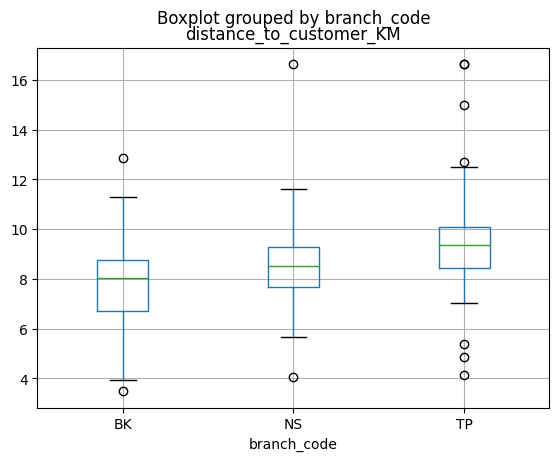

In [ ]:
bp = dirty_data_df.boxplot(column='distance_to_customer_KM', by = 'branch_code')

In [ ]:
Q1 = dirty_data_df['distance_to_customer_KM'].quantile(0.25)
Q3 = dirty_data_df['distance_to_customer_KM'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = dirty_data_df[(dirty_data_df['distance_to_customer_KM'] < lower_bound) | (dirty_data_df['distance_to_customer_KM'] > upper_bound)]['distance_to_customer_KM']

outliers_idx = (dirty_data_df['distance_to_customer_KM'] < lower_bound) | (dirty_data_df['distance_to_customer_KM'] > upper_bound)
print(outliers)


255    12.15
Name: distance_to_customer_KM, dtype: float64


Turning all the outlier values into Nan so that i can apply the function on them.

In [ ]:

dirty_data_df.loc[outliers_idx, 'distance_to_customer_KM'] = np.nan

In [ ]:
dirty_data_df.head(50)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,customer_node
0,ORDX05351,2018-12-08,15:26:11,Dinner,BK,"[('Steak', 3), ('Fries', 1), ('Chicken', 2), (...",369.40,-37.799563,144.963224,0,8.134,16.617447,257506564
1,ORDK10740,2018-12-03,10:11:49,Breakfast,TP,"[('Pancake', 9), ('Eggs', 1), ('Coffee', 4), (...",333.25,-37.811068,145.000570,0,NaN,9.322163,2239389713
2,ORDX05778,2018-04-03,11:02:32,Breakfast,BK,"[('Coffee', 3), ('Eggs', 7), ('Pancake', 9)]",394.75,-37.805352,144.973653,0,6.763,11.386221,4294474620
3,ORDA03597,2018-01-02,09:00:50,Breakfast,BK,"[('Coffee', 4), ('Pancake', 3)]",102.75,-37.802962,144.929045,0,10.605,15.389721,3326880148
4,ORDI10790,2018-01-14,08:20:16,Breakfast,BK,"[('Coffee', 4), ('Cereal', 10), ('Eggs', 10), ...",508.50,-37.806722,144.962961,1,7.335,7.226301,2183271188
5,ORDZ07616,2018-07-20,14:35:29,Lunch,NS,"[('Pasta', 8), ('Salad', 6), ('Steak', 1)]",244.20,-37.818528,144.954025,0,9.129,14.797238,2174950800
6,ORDC02250,2018-07-08,15:16:03,Lunch,NS,"[('Burger', 2), ('Steak', 10), ('Salad', 5), (...",670.00,-37.810112,144.962187,0,7.573,13.030362,6167279409
7,ORDZ09091,2018-10-18,17:38:01,Dinner,NS,"[('Pasta', 3), ('Shrimp', 5)]",352.50,-37.802736,144.951118,0,8.086,14.190162,282825849
8,ORDC01627,2018-02-12,09:21:07,Breakfast,NS,"[('Coffee', 4), ('Eggs', 8), ('Pancake', 9), (...",634.25,-37.805345,144.928840,0,10.493,15.326507,581711531
9,ORDB08317,2018-05-20,12:33:48,Lunch,BK,"[('Salad', 5), ('Burger', 8), ('Steak', 6)]",604.00,-37.801974,144.957198,0,9.510,14.590319,1283637397


In [ ]:
dirty_data_df['customer_node'] = dirty_data_df.apply(lambda row: find_nearest_node(row['customer_lat'], row['customer_lon']), axis=1)

In [ ]:
branches_df['branch_node'] = branches_df.apply(lambda row: find_nearest_node(row['branch_lat'], row['branch_lon']), axis=1)


In [ ]:
def find_nearest_node(customer_lat, customer_lon):
    distances = np.sqrt((nodes_df['lat'] - customer_lat)**2 + (nodes_df['lon'] - customer_lon)**2)
    nearest_node_idx = distances.idxmin()
    return nodes_df.at[nearest_node_idx, 'node']

In [ ]:
# Apply the function to each customer in the df1_updated
dirty_data_df['customer_node'] = dirty_data_df.apply(lambda row: find_nearest_node(row['customer_lat'], row['customer_lon']), axis=1)

In [ ]:
# Function to find the nearest branch node using Euclidean distance from branch lat and lon
def find_nearest_node(lat, lon):
    distances = np.sqrt((nodes_df['lat'] - lat)**2 + (nodes_df['lon'] - lon)**2)
    nearest_node_idx = distances.idxmin()
    return nodes_df.at[nearest_node_idx, 'node']

In [ ]:
# Merge df1_updated with branches_df to add the branch_node column

dirty_data_df = dirty_data_df.merge(branches_df[['branch_code', 'branch_node']], on='branch_code', how='left')

In [ ]:
G = nx.DiGraph()

In [ ]:
 #Function to calculate the shortest path distance using Dijkstra's algorithm - shortest path available calculated using the nodes and edges (distance) - which is now converted to km

def calculate_shortest_path_distance(branch_node, customer_node):
    try:
        distance = nx.dijkstra_path_length(G, branch_node, customer_node, weight='weight') / 1000  # Convert meters to kilometers
        return distance
    except nx.NetworkXNoPath:
        return np.nan

In [ ]:
# Update the missing values in distance_to_customer_KM

for idx, row in dirty_data_df.iterrows():
    if pd.isna(row['distance_to_customer_KM']):
        branch_node = row['branch_node']
        customer_node = row['customer_node']
        if pd.notna(branch_node) and pd.notna(customer_node):
            if branch_node in G.nodes and customer_node in G.nodes:
                distance = calculate_shortest_path_distance(branch_node, customer_node)
                dirty_data_df.at[idx, 'distance_to_customer_KM'] = distance
            else:
                dirty_data_df.at[idx, 'distance_to_customer_KM'] = np.nan
        else:
            dirty_data_df.at[idx, 'distance_to_customer_KM'] = np.nan

checking to see if it turned Nan

In [ ]:
dirty_data_df.head(50)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,customer_node,branch_node
0,ORDX05351,2018-12-08,15:26:11,Dinner,BK,"[('Steak', 3), ('Fries', 1), ('Chicken', 2), (...",369.40,-37.799563,144.963224,0,8.134,16.617447,257506564,1889485053
1,ORDK10740,2018-12-03,10:11:49,Breakfast,TP,"[('Pancake', 9), ('Eggs', 1), ('Coffee', 4), (...",333.25,-37.811068,145.000570,0,NaN,9.322163,2239389713,1390575046
2,ORDX05778,2018-04-03,11:02:32,Breakfast,BK,"[('Coffee', 3), ('Eggs', 7), ('Pancake', 9)]",394.75,-37.805352,144.973653,0,6.763,11.386221,4294474620,1889485053
3,ORDA03597,2018-01-02,09:00:50,Breakfast,BK,"[('Coffee', 4), ('Pancake', 3)]",102.75,-37.802962,144.929045,0,10.605,15.389721,3326880148,1889485053
4,ORDI10790,2018-01-14,08:20:16,Breakfast,BK,"[('Coffee', 4), ('Cereal', 10), ('Eggs', 10), ...",508.50,-37.806722,144.962961,1,7.335,7.226301,2183271188,1889485053
5,ORDZ07616,2018-07-20,14:35:29,Lunch,NS,"[('Pasta', 8), ('Salad', 6), ('Steak', 1)]",244.20,-37.818528,144.954025,0,9.129,14.797238,2174950800,2455254505
6,ORDC02250,2018-07-08,15:16:03,Lunch,NS,"[('Burger', 2), ('Steak', 10), ('Salad', 5), (...",670.00,-37.810112,144.962187,0,7.573,13.030362,6167279409,2455254505
7,ORDZ09091,2018-10-18,17:38:01,Dinner,NS,"[('Pasta', 3), ('Shrimp', 5)]",352.50,-37.802736,144.951118,0,8.086,14.190162,282825849,2455254505
8,ORDC01627,2018-02-12,09:21:07,Breakfast,NS,"[('Coffee', 4), ('Eggs', 8), ('Pancake', 9), (...",634.25,-37.805345,144.928840,0,10.493,15.326507,581711531,2455254505
9,ORDB08317,2018-05-20,12:33:48,Lunch,BK,"[('Salad', 5), ('Burger', 8), ('Steak', 6)]",604.00,-37.801974,144.957198,0,9.510,14.590319,1283637397,1889485053


In [ ]:
print(outliers)

67      5.163
176    12.297
447    12.319
464     5.088
Name: distance_to_customer_KM, dtype: float64


<div class="alert alert-block alert-success">
    
## 4.2   Missing Values <a class="anchor" name="task1.2"></a>


(TASK 1, QUESTION 2)

This task involves imputing the missing value for delivery_fee column.

For accurate imputation, through data exploration, missing values in the dataset have been identified in two other columns.  These have been populated, to provide the maximum amount of data to be used for linear regression, to impute the missing delivery_fee values.

Different combinations of data have been used to provide a range of models possible for imputing the values.

These models have been evaluated, and the most accurate combination has been used to impute the values.

FIRST, EDA WAS CARRIED OUT ON THE DATASET PROVIDED (Group105_missing_data.csv)

## EXPLORATORY DATA ANALYSIS
Including:
- length (rows)
- width (or columns)
- column types
- basic stats
- head & tail of data

In [115]:
#Check head and tail of df1

df1

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDA02151,2018-12-03,19:09:17,Dinner,BK,"[('Shrimp', 4), ('Pasta', 6), ('Salmon', 5), (...",621.00,-37.818807,144.954663,0,8.651,NaN
1,ORDY01306,2018-11-11,18:28:43,Dinner,TP,"[('Pasta', 3), ('Fish&Chips', 10)]",432.50,-37.815188,144.945009,0,9.563,15.066511
2,ORDI08330,2018-12-03,19:09:17,Dinner,NS,"[('Salmon', 1), ('Shrimp', 8)]",473.00,-37.816970,144.961049,0,8.544,14.124068
3,ORDJ09311,2018-05-28,12:54:05,Lunch,NaN,"[('Burger', 3), ('Chicken', 9), ('Salad', 9), ...",805.80,-37.817548,144.933481,0,10.844,14.575940
4,ORDA08024,2018-02-14,09:21:07,Breakfast,BK,"[('Pancake', 5), ('Eggs', 8), ('Coffee', 2)]",312.25,-37.810901,144.958923,0,7.853,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORDI08361,2018-04-18,11:32:57,Breakfast,NaN,"[('Coffee', 3), ('Pancake', 6)]",168.00,-37.815253,144.974801,0,NaN,12.536205
496,ORDZ01676,2018-09-01,16:06:45,Dinner,NaN,"[('Shrimp', 2), ('Salmon', 3), ('Fish&Chips', ...",446.00,-37.816403,144.955261,0,8.762,16.562424
497,ORDY08489,2018-05-22,12:33:48,Lunch,TP,"[('Chicken', 7), ('Steak', 9), ('Salad', 8), (...",921.60,-37.817576,144.967141,0,7.724,11.617112
498,ORDI01993,2018-05-27,12:43:56,Lunch,NS,"[('Fries', 2), ('Steak', 8)]",384.00,-37.798315,144.960016,0,7.192,14.467951


In [116]:
#Check column types - categorical: Ordinal/nominal; Numerical: Continuous/Discrete
#Delivery Fee has 450 entries, the rest are nul values; it is a float (not numerical)
#Order items are string

df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 500 non-null    object 
 1   date                     500 non-null    object 
 2   time                     500 non-null    object 
 3   order_type               500 non-null    object 
 4   branch_code              400 non-null    object 
 5   order_items              500 non-null    object 
 6   order_price              500 non-null    float64
 7   customer_lat             500 non-null    float64
 8   customer_lon             500 non-null    float64
 9   customerHasloyalty?      500 non-null    int64  
 10  distance_to_customer_KM  450 non-null    float64
 11  delivery_fee             450 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


In [117]:
#Check stats for each variable:
df1.describe()

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,500.00000,500.000000,500.000000,500.000000,450.000000,450.000000
mean,514.31720,-37.812567,144.966999,0.044000,8.624216,13.879917
std,269.82843,0.007653,0.020819,0.205301,1.659657,2.469557
min,51.50000,-37.827984,144.926022,0.000000,3.516000,4.094509
25%,317.37500,-37.818972,144.953910,0.000000,7.720250,12.549295
50%,459.40000,-37.812636,144.964574,0.000000,8.658000,14.079154
75%,696.42500,-37.806565,144.978492,0.000000,9.636750,15.511107
max,1534.00000,-37.793099,145.022630,1.000000,14.095000,19.309871


In [118]:
#Sum of missing values for each column - double check missing values for the columns
df1.isnull().sum()

order_id                     0
date                         0
time                         0
order_type                   0
branch_code                100
order_items                  0
order_price                  0
customer_lat                 0
customer_lon                 0
customerHasloyalty?          0
distance_to_customer_KM     50
delivery_fee                50
dtype: int64

In [119]:
#Check for NaN values in delivery fee
df1['delivery_fee'].isna().sum()

50

In [120]:
#Ensure there are no zero values
zero_values = (df1['delivery_fee'] == 0).sum()
print(zero_values)

0


<Axes: >

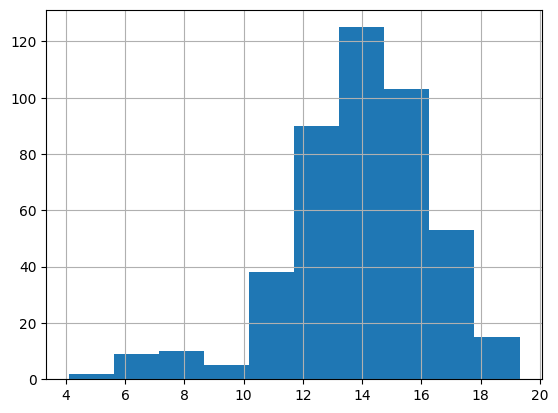

In [121]:
#Check distribution of delivery fee
df1['delivery_fee'].hist()

In [122]:
# check unique values - There is an array of values, including nan
df1['delivery_fee'].unique()

array([       nan, 15.0665113, 14.1240682, 14.5759404, 11.9026884,
       14.5490355, 19.1279037, 14.9027832, 10.1004208, 14.2018857,
       13.8992243, 13.9027622, 14.5749044, 14.3086642, 15.0064749,
       15.9482641, 17.2679256, 12.3237126, 15.551849 ,  7.7666832,
       17.2447396, 12.2925139, 13.4540495, 13.5765178, 14.8627099,
        5.8466037, 16.4993471, 15.2737815, 14.1021557, 13.0362501,
       15.9579608, 13.0643934, 14.4645759,  6.301647 , 14.7368294,
       18.378547 , 11.1198398, 16.7099821, 14.1727699, 15.7110618,
        7.0100069, 14.7114133, 15.1358444, 12.3687335, 11.7852654,
       11.6025846, 11.8587279, 13.7481013, 17.8945416, 14.3438441,
       15.4191434, 17.3816945, 17.7508137, 15.1342494, 10.6551475,
        9.1474511, 12.6561227, 15.2807401, 12.1099338, 12.6577655,
       12.6302459, 12.3007754, 13.5674486, 14.828963 , 16.2444507,
       12.5828644,  5.0658422, 13.4233352,  7.4109767, 12.5212785,
       13.6121234, 11.8950415, 12.490789 , 15.5753548, 12.7994

branch_code
NS    142
BK    139
TP    119
Name: count, dtype: int64
order_type
Lunch        180
Dinner       179
Breakfast    141
Name: count, dtype: int64


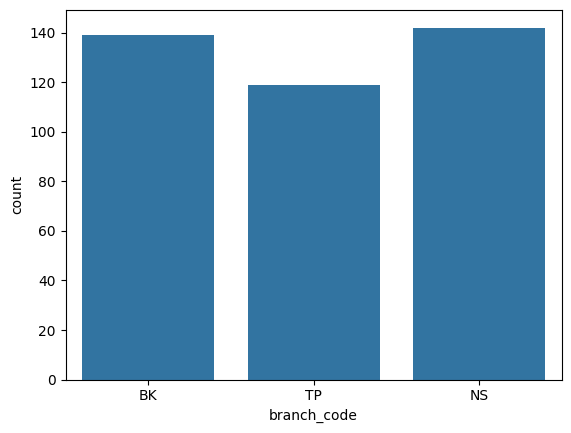

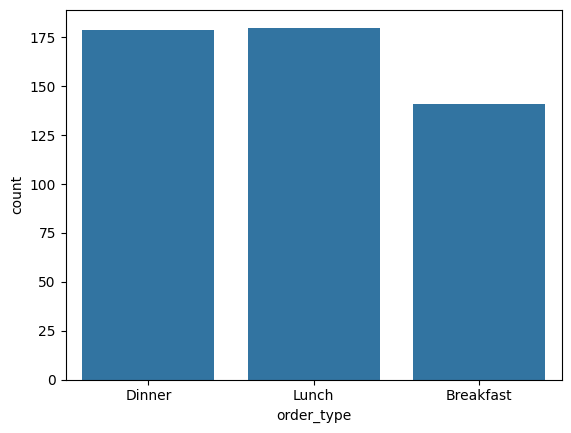

In [123]:
# View Distribution of categorical variables
print(df1['branch_code'].value_counts())
print(df1['order_type'].value_counts())

import seaborn as sns

# Count plot of branch_code
sns.countplot(data=df1, x='branch_code')
plt.show()

# Count plot of order_type
sns.countplot(data=df1, x='order_type')
plt.show()

#TP Branch has fewer orders than BK and NS
#There are fewer breakfasts ordered compared to lunch and dinner

Branch NS has the most number of orders, followed by BK, and then TP Lunch has the largest number of orders, closely followed by dinner, and then breakfast.

The numerical columns can be visualised in histograms to see the distribution of the columns

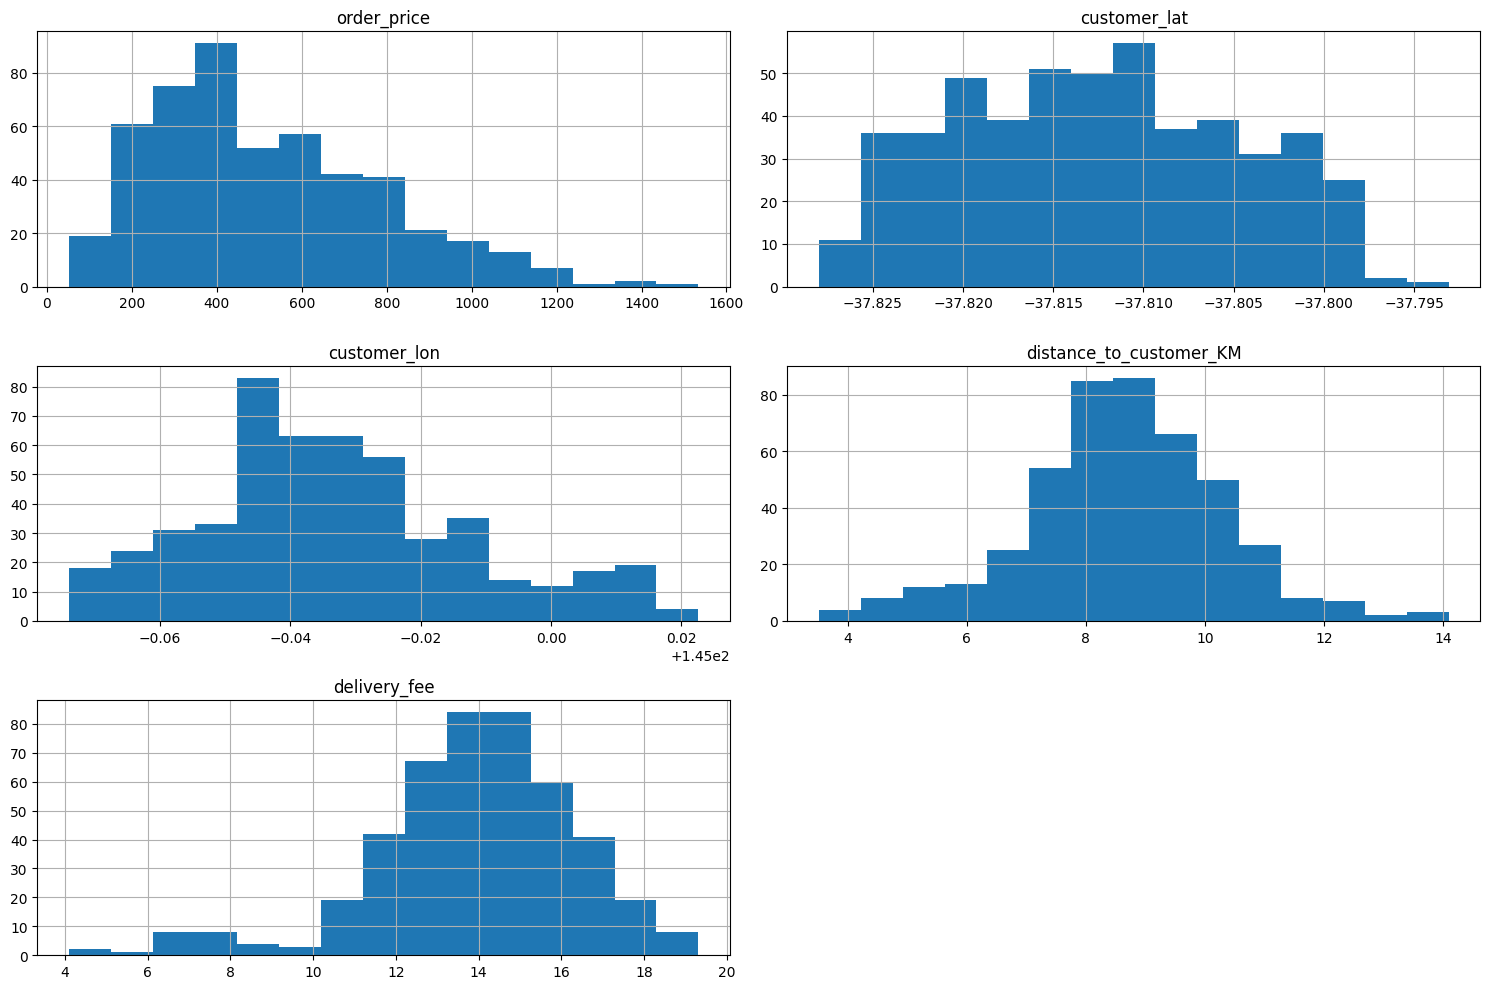

In [124]:
# Histograms of numerical columns
df1[['order_price', 'customer_lat', 'customer_lon', 'distance_to_customer_KM', 'delivery_fee']].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()


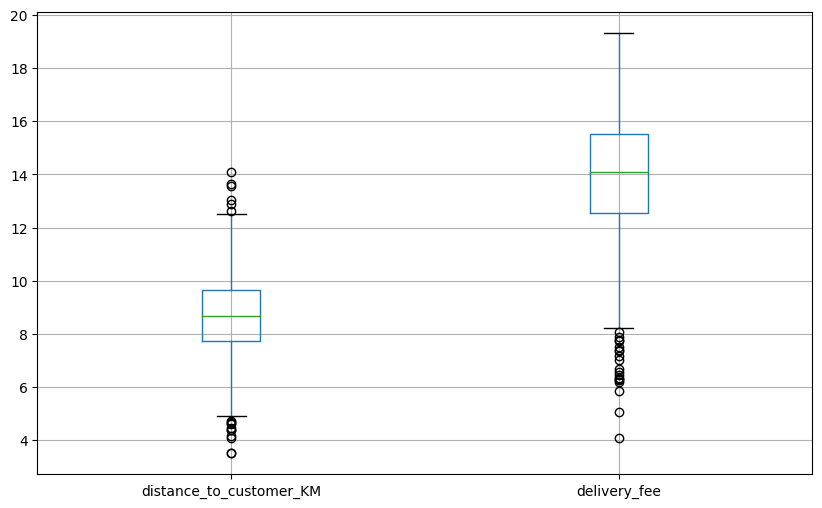

In [125]:
# Box plot of distance to customer and delivery fee - NO SIGNIFICANT FINDINGS
df1[['distance_to_customer_KM', 'delivery_fee']].boxplot(figsize=(10, 6))
plt.show()


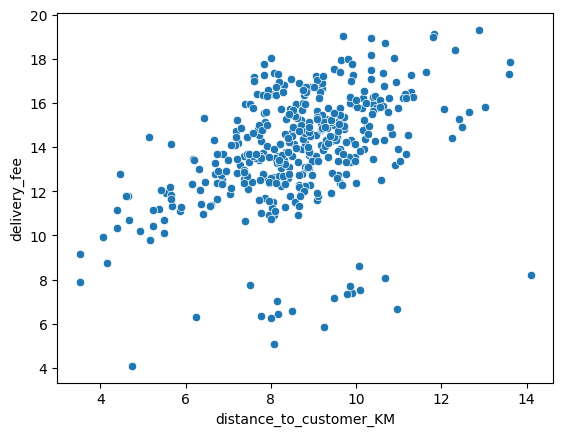

In [126]:
# Scatter plot of distance_to_customer_KM vs delivery_fee
sns.scatterplot(data=df1, x='distance_to_customer_KM', y='delivery_fee')
plt.show()

# A linear relationship can be seen between distance to customer and delivery fee

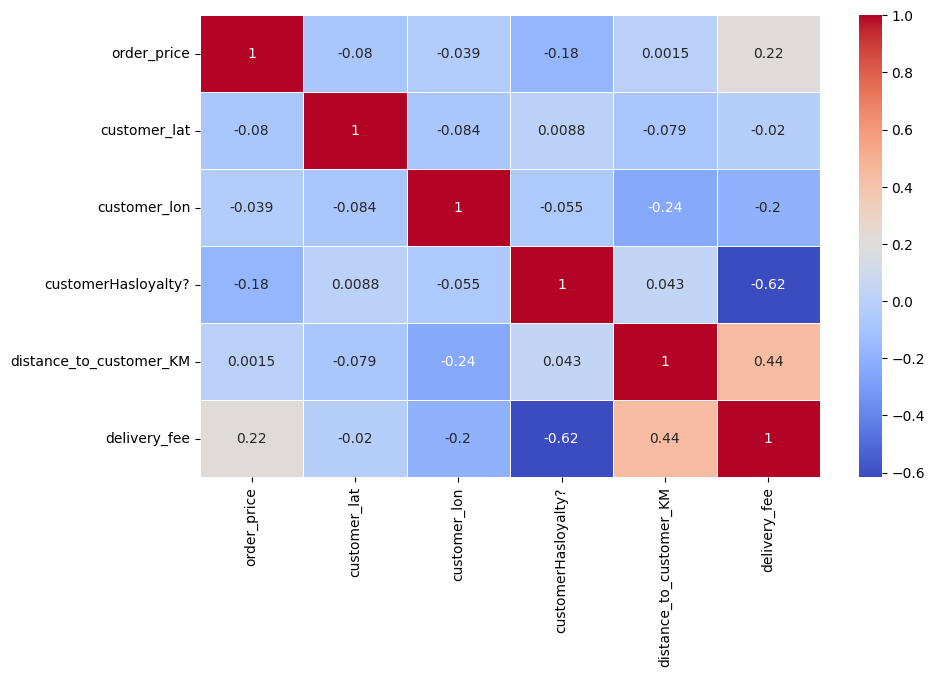

In [127]:
# Correlation matrix heatmap
#Convert delivery fee from string to numeric

# Select only numeric columns
numeric_df1 = df1.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df1.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

#Insight to Correlation Matrix
Moderate positive correlation with delivery_fee (0.44): As the distance to the customer increases, the delivery fee tends to increase.

## Conclusion:
The delivery fee is primarily influenced by the distance to the customer and whether the customer has a loyalty program.
The further away the customer, the higher the delivery fee.
Customers with loyalty programs typically pay lower delivery fees.

# Imputation of Missing Values

#Investigate the delivery fee, as the delivery fee is calculated using a different method for each branch.
- The fee depends linearly (but in different ways for each branch) on:

     a. weekend or weekday (1 or 0)- as a continuous variable

     b. time of the day (morning 0, afternoon 1, evening 2)- as a continuous variable

     c. distance between branch and customer

In [128]:
#Mean delivery fee
df1['delivery_fee'].mean()

13.87991654711111

In [129]:
# Mean imputation of delivery fee by branch code
df1.groupby('branch_code')['delivery_fee'].mean()

#There is a difference in the mean delivery fee for each branch. However:
#There are 100 missing values in the branch code

branch_code
BK    13.918002
NS    14.547548
TP    13.060845
Name: delivery_fee, dtype: float64

#Create new column for: weekend or weekday (1 or 0)- as a continuous variable

In [130]:
# Convert 'date' and 'time' columns to datetime
df1['date'] = pd.to_datetime(df1['date'])
df1['time'] = pd.to_datetime(df1['time'], format='%H:%M:%S').dt.time

In [131]:
# Create 'weekend' column: 1 if weekend, 0 if weekday
df1['weekend'] = df1['date'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)

# Create new column for: time of the day (morning 0, afternoon 1, evening 2)- as a continuous variable

In [132]:
# Create 'time_of_day' column: 0 for morning, 1 for afternoon, 2 for evening
def get_time_of_day(time):
    if time <= pd.to_datetime('12:00:00').time():
        return 0  # Morning
    elif time <= pd.to_datetime('16:00:00').time():
        return 1  # Afternoon
    else:
        return 2  # Evening

In [133]:
df1['time_of_day'] = df1['time'].apply(get_time_of_day)

In [134]:
# Display the first ten rows to verify the new columns
print(df1.head(10))

    order_id       date      time order_type branch_code  \
0  ORDA02151 2018-12-03  19:09:17     Dinner          BK   
1  ORDY01306 2018-11-11  18:28:43     Dinner          TP   
2  ORDI08330 2018-12-03  19:09:17     Dinner          NS   
3  ORDJ09311 2018-05-28  12:54:05      Lunch         NaN   
4  ORDA08024 2018-02-14  09:21:07  Breakfast          BK   
5  ORDA01410 2018-11-08  18:18:35     Dinner          BK   
6  ORDC03301 2018-10-08  17:17:44     Dinner         NaN   
7  ORDA00938 2018-09-05  16:06:45     Dinner          BK   
8  ORDY00947 2018-12-22  19:49:51     Dinner          TP   
9  ORDK06203 2018-04-19  11:32:57  Breakfast          BK   

                                         order_items  order_price  \
0  [('Shrimp', 4), ('Pasta', 6), ('Salmon', 5), (...       621.00   
1                 [('Pasta', 3), ('Fish&Chips', 10)]       432.50   
2                     [('Salmon', 1), ('Shrimp', 8)]       473.00   
3  [('Burger', 3), ('Chicken', 9), ('Salad', 9), ...       805.

In [135]:
#Create a new dataframe, a copy of df1 to perform the next manipulation; and another to prepare a variation of the manipulation

df1_updated = df1.copy()
df2_updated = df1.copy()

# IMPUTE MISSING BRANCH VALUES BY IDENTIFYING PATTERNS IN ORDER_ID

In [136]:
#Subset dataframe to focus on order_id and branch_code columns

df_subset = df1_updated[['order_id', 'branch_code']]

In [137]:
#check subset
df_subset.head()

,order_id,branch_code
0,ORDA02151,BK
1,ORDY01306,TP
2,ORDI08330,NS
3,ORDJ09311,NaN
4,ORDA08024,BK


In [138]:
#Extract first four letters from order_id to examine the relationship between them and the branch_code and check

df_subset.loc[:, 'order_id_strings'] = df_subset['order_id'].str[:4]
df_subset

<ipython-input-138-078b26a4bd0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.loc[:, 'order_id_strings'] = df_subset['order_id'].str[:4]


,order_id,branch_code,order_id_strings
0,ORDA02151,BK,ORDA
1,ORDY01306,TP,ORDY
2,ORDI08330,NS,ORDI
3,ORDJ09311,NaN,ORDJ
4,ORDA08024,BK,ORDA
...,...,...,...
495,ORDI08361,NaN,ORDI
496,ORDZ01676,NaN,ORDZ
497,ORDY08489,TP,ORDY
498,ORDI01993,NS,ORDI


In [139]:
# Add a count column for tallying the order_id_strings
df_subset.loc[:, 'count'] = 1

<ipython-input-139-100a70725ad5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.loc[:, 'count'] = 1


In [140]:
#Use aggregrate function to sum count column for unique entries in order_id_strings
aggregated_counts = df_subset.groupby(['order_id_strings', 'branch_code']).sum().reset_index()

In [141]:
#Pivot the table
pivot_df = aggregated_counts.pivot(
    index='order_id_strings',
    columns='branch_code',
    values='count'
).fillna(0).astype(int)

pivot_df

branch_code,BK,NS,TP
order_id_strings,,,
ORDA,40,0,0
ORDB,0,0,39
ORDC,0,43,0
ORDI,0,52,0
ORDJ,0,0,46
ORDK,48,0,0
ORDX,51,0,0
ORDY,0,0,34
ORDZ,0,47,0


It can be seen each branch has unique strings at the start of the order_id.
These strings can be used to identify missing branch_codes.


In [142]:
# Created a function to determine branch code from the order_id column where values are NaN (pd.isna(row['branch_code']) using the first the prefix strings [:4]

def fill_branch_code(row):
    if pd.isna(row['branch_code']):
        prefix = row['order_id'][:4]
        if prefix in ['ORDA', 'ORDK', 'ORDX']:
            return 'BK'
        elif prefix in ['ORDZ', 'ORDC', 'ORDI']:
            return 'NS'
        elif prefix in ['ORDY', 'ORDJ', 'ORDB']:
            return 'TP'
    return row['branch_code']

In [143]:
# Apply the function to fill the branch_code column in df1_updated and check missing branch_code values have been imputed
df1_updated['branch_code'] = df1_updated.apply(fill_branch_code, axis=1)
df1_updated

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekend,time_of_day
0,ORDA02151,2018-12-03,19:09:17,Dinner,BK,"[('Shrimp', 4), ('Pasta', 6), ('Salmon', 5), (...",621.00,-37.818807,144.954663,0,8.651,NaN,0,2
1,ORDY01306,2018-11-11,18:28:43,Dinner,TP,"[('Pasta', 3), ('Fish&Chips', 10)]",432.50,-37.815188,144.945009,0,9.563,15.066511,1,2
2,ORDI08330,2018-12-03,19:09:17,Dinner,NS,"[('Salmon', 1), ('Shrimp', 8)]",473.00,-37.816970,144.961049,0,8.544,14.124068,0,2
3,ORDJ09311,2018-05-28,12:54:05,Lunch,TP,"[('Burger', 3), ('Chicken', 9), ('Salad', 9), ...",805.80,-37.817548,144.933481,0,10.844,14.575940,0,1
4,ORDA08024,2018-02-14,09:21:07,Breakfast,BK,"[('Pancake', 5), ('Eggs', 8), ('Coffee', 2)]",312.25,-37.810901,144.958923,0,7.853,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORDI08361,2018-04-18,11:32:57,Breakfast,NS,"[('Coffee', 3), ('Pancake', 6)]",168.00,-37.815253,144.974801,0,NaN,12.536205,0,0
496,ORDZ01676,2018-09-01,16:06:45,Dinner,NS,"[('Shrimp', 2), ('Salmon', 3), ('Fish&Chips', ...",446.00,-37.816403,144.955261,0,8.762,16.562424,1,2
497,ORDY08489,2018-05-22,12:33:48,Lunch,TP,"[('Chicken', 7), ('Steak', 9), ('Salad', 8), (...",921.60,-37.817576,144.967141,0,7.724,11.617112,0,1
498,ORDI01993,2018-05-27,12:43:56,Lunch,NS,"[('Fries', 2), ('Steak', 8)]",384.00,-37.798315,144.960016,0,7.192,14.467951,1,1


In [144]:
# Apply the function to fill the branch_code column in df2_updated too
df2_updated['branch_code'] = df2_updated.apply(fill_branch_code, axis=1)

##Calculate missing values for distance_to_customer_KM Using the Supplementary Data Provided

- branches.csv
- edges.csv
- nodes.csv

##Euclidean distance will be used to find the nearest node to the longitude and latitude values.
This technique will the closest match between the customer and branch longitude and latitude values, and ensure no NaN values are returned.

This will be ensure the linear regression model for calculating missing delivery fee values, can perform with the maxiumum data available.

In [148]:
# Function to find the nearest Customer node using Euclidean distance from Customer_lat and Customer_lon
def find_nearest_node(customer_lat, customer_lon):
    distances = np.sqrt((nodes_df['lat'] - customer_lat)**2 + (nodes_df['lon'] - customer_lon)**2)
    nearest_node_idx = distances.idxmin()
    return nodes_df.at[nearest_node_idx, 'node']

In [149]:
# Apply the function to each customer in the df1_updated to form a new column customer_node
df1_updated['customer_node'] = df1_updated.apply(lambda row: find_nearest_node(row['customer_lat'], row['customer_lon']), axis=1)

In [150]:
# Check updated table
df1_updated.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekend,time_of_day,customer_node
0,ORDA02151,2018-12-03,19:09:17,Dinner,BK,"[('Shrimp', 4), ('Pasta', 6), ('Salmon', 5), (...",621.00,-37.818807,144.954663,0,8.651,NaN,0,2,6167191181
1,ORDY01306,2018-11-11,18:28:43,Dinner,TP,"[('Pasta', 3), ('Fish&Chips', 10)]",432.50,-37.815188,144.945009,0,9.563,15.066511,1,2,3199579113
2,ORDI08330,2018-12-03,19:09:17,Dinner,NS,"[('Salmon', 1), ('Shrimp', 8)]",473.00,-37.816970,144.961049,0,8.544,14.124068,0,2,6167191171
3,ORDJ09311,2018-05-28,12:54:05,Lunch,TP,"[('Burger', 3), ('Chicken', 9), ('Salad', 9), ...",805.80,-37.817548,144.933481,0,10.844,14.575940,0,1,5332193019
4,ORDA08024,2018-02-14,09:21:07,Breakfast,BK,"[('Pancake', 5), ('Eggs', 8), ('Coffee', 2)]",312.25,-37.810901,144.958923,0,7.853,NaN,0,0,3543021913


In [151]:
# Use a function to find the nearest branch node using Euclidean distance and branch lat and lon values
def find_nearest_node(lat, lon):
    distances = np.sqrt((nodes_df['lat'] - lat)**2 + (nodes_df['lon'] - lon)**2)
    nearest_node_idx = distances.idxmin()
    return nodes_df.at[nearest_node_idx, 'node']

In [152]:
# Apply the function to each branch in the branches_df (downloaded from the branches.csv) and check
branches_df['branch_node'] = branches_df.apply(lambda row: find_nearest_node(row['branch_lat'], row['branch_lon']), axis=1)
branches_df.head()

,branch_code,branch_name,branch_lat,branch_lon,branch_node
0,NS,Nickolson,-37.773803,144.983647,2455254505
1,TP,Thompson,-37.861835,144.905716,1390575046
2,BK,Bakers,-37.815834,145.046450,1889485053


In [153]:
# Left Join df1_updated with branches_df to add the branch_node column
df1_updated = df1_updated.merge(branches_df[['branch_code', 'branch_node']], on='branch_code', how='left')
df1_updated.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekend,time_of_day,customer_node,branch_node
0,ORDA02151,2018-12-03,19:09:17,Dinner,BK,"[('Shrimp', 4), ('Pasta', 6), ('Salmon', 5), (...",621.00,-37.818807,144.954663,0,8.651,NaN,0,2,6167191181,1889485053
1,ORDY01306,2018-11-11,18:28:43,Dinner,TP,"[('Pasta', 3), ('Fish&Chips', 10)]",432.50,-37.815188,144.945009,0,9.563,15.066511,1,2,3199579113,1390575046
2,ORDI08330,2018-12-03,19:09:17,Dinner,NS,"[('Salmon', 1), ('Shrimp', 8)]",473.00,-37.816970,144.961049,0,8.544,14.124068,0,2,6167191171,2455254505
3,ORDJ09311,2018-05-28,12:54:05,Lunch,TP,"[('Burger', 3), ('Chicken', 9), ('Salad', 9), ...",805.80,-37.817548,144.933481,0,10.844,14.575940,0,1,5332193019,1390575046
4,ORDA08024,2018-02-14,09:21:07,Breakfast,BK,"[('Pancake', 5), ('Eggs', 8), ('Coffee', 2)]",312.25,-37.810901,144.958923,0,7.853,NaN,0,0,3543021913,1889485053


In [154]:
#Check for any NaN values in customer_node and branch_node columns
df1_updated[['customer_node', 'branch_node']].isna().sum()

customer_node    0
branch_node      0
dtype: int64

##Calculate the shortest distance between branch node and customer node, using Dijkstra's algorithm

In [155]:
# Create the directed graph
G = nx.DiGraph()

In [156]:
# Add nodes with their positions
for idx, row in nodes_df.iterrows():
    G.add_node(row['node'], pos=(row['lat'], row['lon']))

In [157]:
# Add edges with distances as weights
for idx, row in edges_df.iterrows():
    G.add_edge(row['u'], row['v'], weight=row['distance(m)'])

In [158]:
# Function to calculate the shortest path distance using Dijkstra's algorithm - shortest path available calculated using the nodes and edges (distance) - which is now converted to km
def calculate_shortest_path_distance(branch_node, customer_node):
    try:
        distance = nx.dijkstra_path_length(G, branch_node, customer_node, weight='weight') / 1000  # Convert meters to kilometers
        return distance
    except nx.NetworkXNoPath:
        return np.nan

In [159]:
# Update the missing values in distance_to_customer_KM
for idx, row in df1_updated.iterrows():
    if pd.isna(row['distance_to_customer_KM']):
        branch_node = row['branch_node']
        customer_node = row['customer_node']
        if pd.notna(branch_node) and pd.notna(customer_node):
            if branch_node in G.nodes and customer_node in G.nodes:
                distance = calculate_shortest_path_distance(branch_node, customer_node)
                df1_updated.at[idx, 'distance_to_customer_KM'] = distance
            else:
                df1_updated.at[idx, 'distance_to_customer_KM'] = np.nan
        else:
            df1_updated.at[idx, 'distance_to_customer_KM'] = np.nan

In [160]:
#Check dataframe
df1_updated

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekend,time_of_day,customer_node,branch_node
0,ORDA02151,2018-12-03,19:09:17,Dinner,BK,"[('Shrimp', 4), ('Pasta', 6), ('Salmon', 5), (...",621.00,-37.818807,144.954663,0,8.651,NaN,0,2,6167191181,1889485053
1,ORDY01306,2018-11-11,18:28:43,Dinner,TP,"[('Pasta', 3), ('Fish&Chips', 10)]",432.50,-37.815188,144.945009,0,9.563,15.066511,1,2,3199579113,1390575046
2,ORDI08330,2018-12-03,19:09:17,Dinner,NS,"[('Salmon', 1), ('Shrimp', 8)]",473.00,-37.816970,144.961049,0,8.544,14.124068,0,2,6167191171,2455254505
3,ORDJ09311,2018-05-28,12:54:05,Lunch,TP,"[('Burger', 3), ('Chicken', 9), ('Salad', 9), ...",805.80,-37.817548,144.933481,0,10.844,14.575940,0,1,5332193019,1390575046
4,ORDA08024,2018-02-14,09:21:07,Breakfast,BK,"[('Pancake', 5), ('Eggs', 8), ('Coffee', 2)]",312.25,-37.810901,144.958923,0,7.853,NaN,0,0,3543021913,1889485053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORDI08361,2018-04-18,11:32:57,Breakfast,NS,"[('Coffee', 3), ('Pancake', 6)]",168.00,-37.815253,144.974801,0,7.911,12.536205,0,0,1449431441,2455254505
496,ORDZ01676,2018-09-01,16:06:45,Dinner,NS,"[('Shrimp', 2), ('Salmon', 3), ('Fish&Chips', ...",446.00,-37.816403,144.955261,0,8.762,16.562424,1,2,6167417918,2455254505
497,ORDY08489,2018-05-22,12:33:48,Lunch,TP,"[('Chicken', 7), ('Steak', 9), ('Salad', 8), (...",921.60,-37.817576,144.967141,0,7.724,11.617112,0,1,2412954937,1390575046
498,ORDI01993,2018-05-27,12:43:56,Lunch,NS,"[('Fries', 2), ('Steak', 8)]",384.00,-37.798315,144.960016,0,7.192,14.467951,1,1,363384252,2455254505


#If a customer has loyalty, they get a 50% discount on delivery fee

In [161]:
# Use np.where to create the 'delivery_fee_updated' column
df1_updated['delivery_fee'] = np.where(df1_updated['customerHasloyalty?'] == 1, df1_updated['delivery_fee'] * 0.5, df1_updated['delivery_fee'])

In [162]:
#Check up_dated df1_updated
df1_updated.head(30)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekend,time_of_day,customer_node,branch_node
0,ORDA02151,2018-12-03,19:09:17,Dinner,BK,"[('Shrimp', 4), ('Pasta', 6), ('Salmon', 5), (...",621.00,-37.818807,144.954663,0,8.651,NaN,0,2,6167191181,1889485053
1,ORDY01306,2018-11-11,18:28:43,Dinner,TP,"[('Pasta', 3), ('Fish&Chips', 10)]",432.50,-37.815188,144.945009,0,9.563,15.066511,1,2,3199579113,1390575046
2,ORDI08330,2018-12-03,19:09:17,Dinner,NS,"[('Salmon', 1), ('Shrimp', 8)]",473.00,-37.816970,144.961049,0,8.544,14.124068,0,2,6167191171,2455254505
3,ORDJ09311,2018-05-28,12:54:05,Lunch,TP,"[('Burger', 3), ('Chicken', 9), ('Salad', 9), ...",805.80,-37.817548,144.933481,0,10.844,14.575940,0,1,5332193019,1390575046
4,ORDA08024,2018-02-14,09:21:07,Breakfast,BK,"[('Pancake', 5), ('Eggs', 8), ('Coffee', 2)]",312.25,-37.810901,144.958923,0,7.853,NaN,0,0,3543021913,1889485053
5,ORDA01410,2018-11-08,18:18:35,Dinner,BK,"[('Fish&Chips', 4), ('Pasta', 9)]",387.50,-37.814344,144.988275,0,5.530,11.902688,0,2,241807198,1889485053
6,ORDC03301,2018-10-08,17:17:44,Dinner,NS,"[('Pasta', 2), ('Salmon', 9)]",424.00,-37.813753,144.957330,0,8.325,14.549036,0,2,4520380525,2455254505
7,ORDA00938,2018-09-05,16:06:45,Dinner,BK,"[('Shrimp', 5), ('Fish&Chips', 9), ('Salmon', ...",1132.50,-37.815048,144.927595,0,11.835,19.127904,0,2,4754200370,1889485053
8,ORDY00947,2018-12-22,19:49:51,Dinner,TP,"[('Salmon', 6), ('Pasta', 5)]",383.50,-37.818014,144.947058,0,9.270,14.902783,1,2,560984926,1390575046
9,ORDK06203,2018-04-19,11:32:57,Breakfast,BK,"[('Eggs', 2), ('Coffee', 1)]",51.50,-37.804742,144.989711,0,5.501,10.100421,0,0,227316218,1889485053


In [163]:
df1_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 500 non-null    object        
 1   date                     500 non-null    datetime64[ns]
 2   time                     500 non-null    object        
 3   order_type               500 non-null    object        
 4   branch_code              500 non-null    object        
 5   order_items              500 non-null    object        
 6   order_price              500 non-null    float64       
 7   customer_lat             500 non-null    float64       
 8   customer_lon             500 non-null    float64       
 9   customerHasloyalty?      500 non-null    int64         
 10  distance_to_customer_KM  499 non-null    float64       
 11  delivery_fee             450 non-null    float64       
 12  weekend                  500 non-nul

In [164]:
# Use np.where to create the 'delivery_fee_updated' column
df2_updated['delivery_fee'] = np.where(df2_updated['customerHasloyalty?'] == 1, df2_updated['delivery_fee'] * 0.5, df2_updated['delivery_fee'])

Variables affecting delivery fee values have been imputed and calculated, a regression model can be created to calculate the missing delivery fee values

##CREATE LINEAR REGRESSION MODEL TO CALCULATE MISSING DELIVERY_FEE VALUES

In [ ]:
#Libraries Used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

EACH BRANCH HAS A DIFFERENT DELIVERY FEE SYSTEM - A separate model has been created for each branch, by splitting the dataset

##Columns affecting the delivery_fee will be used to create the models:
- Branch_code
- customerHasloyalty?
- weekend
- time_of_day
- distance_between_branch_&_customer(km)

In [165]:
#Rows with missing values can not be used to train the model - drop rows with missing values in delivery fee
#Drop rows with missing values
#Make a copy of this data because we will use it again to impute values
df1_dropna = df1_updated.dropna().copy()
df1_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449 entries, 1 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 449 non-null    object        
 1   date                     449 non-null    datetime64[ns]
 2   time                     449 non-null    object        
 3   order_type               449 non-null    object        
 4   branch_code              449 non-null    object        
 5   order_items              449 non-null    object        
 6   order_price              449 non-null    float64       
 7   customer_lat             449 non-null    float64       
 8   customer_lon             449 non-null    float64       
 9   customerHasloyalty?      449 non-null    int64         
 10  distance_to_customer_KM  449 non-null    float64       
 11  delivery_fee             449 non-null    float64       
 12  weekend                  449 non-null    

In [166]:
#REPEAT WITH df2_updated
df2_dropna = df2_updated.dropna().copy()

In [167]:
grouped = df1_dropna.groupby('branch_code')

In [168]:
# Create separate dataframes for each branch_code
branch_dataframes = {branch: group.copy() for branch, group in grouped}

In [169]:
# Access each dataframe and check
df_BK = branch_dataframes.get('BK')
df_TP = branch_dataframes.get('TP')
df_NS = branch_dataframes.get('NS')

In [170]:
df_BK.head()


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekend,time_of_day,customer_node,branch_node
5,ORDA01410,2018-11-08,18:18:35,Dinner,BK,"[('Fish&Chips', 4), ('Pasta', 9)]",387.5,-37.814344,144.988275,0,5.530,11.902688,0,2,241807198,1889485053
7,ORDA00938,2018-09-05,16:06:45,Dinner,BK,"[('Shrimp', 5), ('Fish&Chips', 9), ('Salmon', ...",1132.5,-37.815048,144.927595,0,11.835,19.127904,0,2,4754200370,1889485053
9,ORDK06203,2018-04-19,11:32:57,Breakfast,BK,"[('Eggs', 2), ('Coffee', 1)]",51.5,-37.804742,144.989711,0,5.501,10.100421,0,0,227316218,1889485053
18,ORDA05238,2018-12-21,19:39:43,Dinner,BK,"[('Shrimp', 3), ('Salmon', 10), ('Pasta', 2), ...",872.0,-37.814853,144.937806,0,9.924,17.267926,0,2,634777979,1889485053
19,ORDA04914,2018-05-09,12:13:31,Lunch,BK,"[('Steak', 9), ('Salad', 4), ('Chicken', 5), (...",717.8,-37.799435,144.988973,0,6.160,12.323713,0,1,227324415,1889485053


In [171]:
df_TP.head()


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekend,time_of_day,customer_node,branch_node
1,ORDY01306,2018-11-11,18:28:43,Dinner,TP,"[('Pasta', 3), ('Fish&Chips', 10)]",432.5,-37.815188,144.945009,0,9.563,15.066511,1,2,3199579113,1390575046
3,ORDJ09311,2018-05-28,12:54:05,Lunch,TP,"[('Burger', 3), ('Chicken', 9), ('Salad', 9), ...",805.8,-37.817548,144.933481,0,10.844,14.575940,0,1,5332193019,1390575046
8,ORDY00947,2018-12-22,19:49:51,Dinner,TP,"[('Salmon', 6), ('Pasta', 5)]",383.5,-37.818014,144.947058,0,9.270,14.902783,1,2,560984926,1390575046
11,ORDB07720,2018-09-03,16:06:45,Dinner,TP,"[('Shrimp', 10), ('Pasta', 9), ('Salmon', 7)]",1074.5,-37.807011,144.949083,0,9.633,13.899224,0,2,4518401167,1390575046
12,ORDJ05102,2018-07-21,14:35:29,Lunch,TP,"[('Burger', 4), ('Fries', 9), ('Salad', 5), ('...",395.0,-37.824144,144.982515,0,8.721,13.902762,1,1,746921910,1390575046


In [172]:
df_NS.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekend,time_of_day,customer_node,branch_node
2,ORDI08330,2018-12-03,19:09:17,Dinner,NS,"[('Salmon', 1), ('Shrimp', 8)]",473.0,-37.816970,144.961049,0,8.544,14.124068,0,2,6167191171,2455254505
6,ORDC03301,2018-10-08,17:17:44,Dinner,NS,"[('Pasta', 2), ('Salmon', 9)]",424.0,-37.813753,144.957330,0,8.325,14.549036,0,2,4520380525,2455254505
10,ORDI11016,2018-05-13,12:23:39,Lunch,NS,"[('Chicken', 5), ('Salad', 10), ('Steak', 10)]",782.0,-37.799579,144.959620,0,7.232,14.201886,1,1,245807236,2455254505
13,ORDI08895,2018-06-04,13:04:13,Lunch,NS,"[('Fries', 2), ('Salad', 5), ('Chicken', 5), (...",405.0,-37.821168,144.972609,0,8.957,14.574904,0,1,457365626,2455254505
16,ORDZ08147,2018-07-09,14:15:12,Lunch,NS,"[('Steak', 4), ('Chicken', 5), ('Salad', 2), (...",544.4,-37.809264,145.001445,0,9.488,15.006475,0,1,2672365503,2455254505


In [173]:
grouped2 = df2_dropna.groupby('branch_code')
# Create separate dataframes for each branch_code
branch2_dataframes = {branch: group.copy() for branch, group in grouped2}
df2_BK = branch2_dataframes.get('BK')
df2_NS = branch2_dataframes.get('NS')
df2_TP = branch2_dataframes.get('TP')

# LINEAR REGRESSION MODEL FOR BRANCHES
- Compute features, target variables

In [181]:
# Define features and target variable including order items
features = ['branch_code', 'customerHasloyalty?', 'weekend', 'time_of_day', 'distance_to_customer_KM']
target = 'delivery_fee'

##Transform Columns for Modelling
- For categorical variable (branch_code) encode using OneHotEncoder
- Pass through numeric columns

In [175]:
# Prepare column transformer for preprocessing
# OneHotEncoder used on categorical variables to change to corresponding numerical values, so it can be used in the model

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['branch_code']),
        ('num', 'passthrough', ['customerHasloyalty?', 'weekend', 'time_of_day', 'distance_to_customer_KM'])
    ]
)

##SPLIT THE ACTUAL DATASET INTO DIFFERENT DATAFRAMES AND APPLY MODELS

In [176]:
pipeline_BK = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [177]:
pipeline_NS = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [178]:
pipeline_TP = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [183]:
# Split the data into training and testing sets
X_BK = df_BK[features]
y_BK = df_BK[target]
X_BK_train, X_BK_test, y_BK_train, y_BK_test = train_test_split(X_BK, y_BK, test_size=0.2, random_state=42)

In [184]:
X_NS = df_NS[features]
y_NS = df_NS[target]
X_NS_train, X_NS_test, y_NS_train, y_NS_test = train_test_split(X_NS, y_NS, test_size=0.3, random_state=42)

In [185]:
X_TP = df_TP[features]
y_TP = df_TP[target]
X_TP_train, X_TP_test, y_TP_train, y_TP_test = train_test_split(X_TP, y_TP, test_size=0.3, random_state=42)


##Train and Evaluate the Models

In [186]:
pipeline_BK.fit(X_BK_train, y_BK_train)

# Evaluate the model for BK branch
score = pipeline_BK.score(X_BK_test, y_BK_test)
print(f'Model R^2 score: {score:.4f}')

Model R^2 score: 0.9703


In [187]:
pipeline_NS.fit(X_NS_train, y_NS_train)

# Evaluate the model for NS branch
score = pipeline_NS.score(X_NS_test, y_NS_test)
print(f'Model R^2 score: {score:.4f}')

Model R^2 score: 0.9779


In [188]:
pipeline_TP.fit(X_TP_train, y_TP_train)

# Evaluate the model for TP branch
score = pipeline_TP.score(X_TP_test, y_TP_test)
print(f'Model R^2 score: {score:.4f}')

Model R^2 score: 0.9712


##Check Accuracy of Prediction using Mean Absolute Error

MAE is the average of the absolute differences between the predicted and actual values.

It gives the average error in the same units as the target variable.

TP has the fewest branches compared to BK and NS. Therefore variance in data will have a greater impact on the model, and thus the MAE is higher compared to the other branches.

In [189]:
# Calculate the predictions on the test set
y_BK_pred = pipeline_BK.predict(X_BK_test)
y_TP_pred = pipeline_TP.predict(X_TP_test)
y_NS_pred = pipeline_NS.predict(X_NS_test)

In [190]:
# Calculate evaluation metrics for dataframes
mae_BK = mean_absolute_error(y_BK_test, y_BK_pred)
mae_TP = mean_absolute_error(y_TP_test, y_TP_pred)
mae_NS = mean_absolute_error(y_NS_test, y_NS_pred)

In [191]:
print(f'Mean Absolute Error (MAE) for BK branch: {mae_BK:.4f}')
print(f'Mean Absolute Error (MAE) for TP branch: {mae_TP:.4f}')
print(f'Mean Absolute Error (MAE for NS branch): {mae_NS:.4f}')

#All levels of MAE are relatively low for the datasets

Mean Absolute Error (MAE) for BK branch: 0.2960
Mean Absolute Error (MAE) for TP branch: 0.3521
Mean Absolute Error (MAE for NS branch): 0.2727


MAE is the average of the absolute differences between the predicted and actual values.

It gives the average error in the same units as the target variable.

TP has the fewest branches compared to BK and NS. Therefore variance in data will have a greater impact on the model, and thus the MAE is higher compared to the other branches.

In [192]:
#REPEAT FOR SECOND DATASET

In [193]:
pipeline2_BK = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline2_NS = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline2_TP = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X2_BK = df2_BK[features]
y2_BK = df2_BK[target]
X2_BK_train, X2_BK_test, y2_BK_train, y2_BK_test = train_test_split(X2_BK, y2_BK, test_size=0.2, random_state=42)

X2_NS = df2_NS[features]
y2_NS = df2_NS[target]
X2_NS_train, X2_NS_test, y2_NS_train, y2_NS_test = train_test_split(X2_NS, y2_NS, test_size=0.3, random_state=42)

X2_TP = df2_TP[features]
y2_TP = df2_TP[target]
X2_TP_train, X2_TP_test, y2_TP_train, y2_TP_test = train_test_split(X2_TP, y2_TP, test_size=0.3, random_state=42)

In [194]:
# Train the models
pipeline2_BK.fit(X2_BK_train, y2_BK_train)
# Evaluate the model for BK branch
score = pipeline2_BK.score(X2_BK_test, y2_BK_test)
print(f'Model2 R^2 score: {score:.4f}')

Model2 R^2 score: 0.9928


This model has a higher R^2 value, returning a more accurate result, and thus will be selected for imputing the delivery fee values

In [195]:
pipeline2_NS.fit(X2_NS_train, y2_NS_train)
# Evaluate the model for NS branch
score = pipeline2_NS.score(X2_NS_test, y2_NS_test)
print(f'Model2 R^2 score: {score:.4f}')

Model2 R^2 score: 0.9752


In [196]:
pipeline2_TP.fit(X2_TP_train, y2_TP_train)
# Evaluate the model for TP branch
score = pipeline2_TP.score(X2_TP_test, y2_TP_test)
print(f'Model2 R^2 score: {score:.4f}')

Model2 R^2 score: 0.9657


R^2 (coefficient of determination) values provide a goodness of fit model for linear regression analysis.

They show how well the model predicts the outcome of the dependent variable.

The models with the highest R^2 values for each dataset will be used to impute the missing delivery fee values.

In [ ]:
# Impute the missing values with the three different models being applied according the value in the 'branch_code' column

In [197]:
# Define the prediction function
def predict_delivery_fee(row):
    if pd.isna(row['delivery_fee']):
        row_features = row[features].to_frame().T
        if row['branch_code'] == 'BK':
            return pipeline2_BK.predict(row_features)[0]
        elif row['branch_code'] == 'NS':
            return pipeline_NS.predict(row_features)[0]
        elif row['branch_code'] == 'TP':
            return pipeline_TP.predict(row_features)[0]
    else:
        return row['delivery_fee']


In [198]:
# Apply the prediction function to fill missing delivery fees
df_final = df1_updated.copy()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 500 non-null    object        
 1   date                     500 non-null    datetime64[ns]
 2   time                     500 non-null    object        
 3   order_type               500 non-null    object        
 4   branch_code              500 non-null    object        
 5   order_items              500 non-null    object        
 6   order_price              500 non-null    float64       
 7   customer_lat             500 non-null    float64       
 8   customer_lon             500 non-null    float64       
 9   customerHasloyalty?      500 non-null    int64         
 10  distance_to_customer_KM  499 non-null    float64       
 11  delivery_fee             450 non-null    float64       
 12  weekend                  500 non-nul

In [199]:
#Apply function with models
df_final['delivery_fee'] = df_final.apply(predict_delivery_fee, axis=1)

In [200]:
#CHECK MISSING DELIVERY_FEE VALUES HAVE BEEN IMPUTED
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 500 non-null    object        
 1   date                     500 non-null    datetime64[ns]
 2   time                     500 non-null    object        
 3   order_type               500 non-null    object        
 4   branch_code              500 non-null    object        
 5   order_items              500 non-null    object        
 6   order_price              500 non-null    float64       
 7   customer_lat             500 non-null    float64       
 8   customer_lon             500 non-null    float64       
 9   customerHasloyalty?      500 non-null    int64         
 10  distance_to_customer_KM  499 non-null    float64       
 11  delivery_fee             500 non-null    float64       
 12  weekend                  500 non-nul

In [201]:
df_final.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekend,time_of_day,customer_node,branch_node
0,ORDA02151,2018-12-03,19:09:17,Dinner,BK,"[('Shrimp', 4), ('Pasta', 6), ('Salmon', 5), (...",621.00,-37.818807,144.954663,0,8.651,15.618311,0,2,6167191181,1889485053
1,ORDY01306,2018-11-11,18:28:43,Dinner,TP,"[('Pasta', 3), ('Fish&Chips', 10)]",432.50,-37.815188,144.945009,0,9.563,15.066511,1,2,3199579113,1390575046
2,ORDI08330,2018-12-03,19:09:17,Dinner,NS,"[('Salmon', 1), ('Shrimp', 8)]",473.00,-37.816970,144.961049,0,8.544,14.124068,0,2,6167191171,2455254505
3,ORDJ09311,2018-05-28,12:54:05,Lunch,TP,"[('Burger', 3), ('Chicken', 9), ('Salad', 9), ...",805.80,-37.817548,144.933481,0,10.844,14.575940,0,1,5332193019,1390575046
4,ORDA08024,2018-02-14,09:21:07,Breakfast,BK,"[('Pancake', 5), ('Eggs', 8), ('Coffee', 2)]",312.25,-37.810901,144.958923,0,7.853,12.725921,0,0,3543021913,1889485053


In [202]:
# Drop the last four columns
df_missing_values = df_final.drop(columns=['weekend','time_of_day', 'customer_node', 'branch_node']).copy()

In [203]:
df_missing_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 500 non-null    object        
 1   date                     500 non-null    datetime64[ns]
 2   time                     500 non-null    object        
 3   order_type               500 non-null    object        
 4   branch_code              500 non-null    object        
 5   order_items              500 non-null    object        
 6   order_price              500 non-null    float64       
 7   customer_lat             500 non-null    float64       
 8   customer_lon             500 non-null    float64       
 9   customerHasloyalty?      500 non-null    int64         
 10  distance_to_customer_KM  499 non-null    float64       
 11  delivery_fee             500 non-null    float64       
dtypes: datetime64[ns](1), float64(5), in

##DOWNLOAD DATA

In [204]:
df_missing_values.to_csv('105_missing_value_solution.csv', index = False)

In [205]:
from google.colab import files

<div class="alert alert-block alert-success">
    
## 4.3   Detect and remove outlier rows <a class="anchor" name="task1.1"></a>

# Outlier Detection Method

Removing outliers is crucial in data analysis and modeling because they can significantly distort statistical measures and model predictions.

Outliers can arise from measurement errors, data entry mistakes, or genuine but rare events. They can skew the mean, inflate the standard deviation, and lead to misleading insights.

In predictive modeling, outliers can disproportionately influence the model, resulting in poor generalisation to new data.

By identifying and removing outliers, a more accurate representation of the data is acheived, leading to more reliable statistical analysis and improved model performance.

Removing outliers enhances the quality of insights and decisions derived from the data.

##Data was used from the loaded outlier data file

In [208]:
#Check head and tail of df1
df1

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDY00750,2018-08-29,15:56:37,Lunch,TP,"[('Chicken', 10), ('Steak', 7)]",635.0,-37.813016,144.951538,0,9.073,6.260004
1,ORDA00459,2018-10-30,17:58:18,Dinner,BK,"[('Pasta', 6), ('Shrimp', 3), ('Salmon', 8)]",655.0,-37.806147,144.939898,0,10.123,17.146756
2,ORDZ01417,2018-10-29,17:58:18,Dinner,NS,"[('Pasta', 4), ('Shrimp', 6)]",434.0,-37.808045,144.973359,0,7.111,6.486396
3,ORDC00450,2018-07-06,14:05:04,Lunch,NS,"[('Burger', 7), ('Steak', 10), ('Chicken', 8),...",1031.0,-37.813178,144.938948,0,10.257,15.946249
4,ORDI10848,2018-03-11,10:11:49,Breakfast,NS,"[('Eggs', 7), ('Cereal', 5)]",259.0,-37.810333,144.980929,0,7.935,14.913006
...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORDA04348,2018-10-15,17:27:53,Dinner,BK,"[('Salmon', 2), ('Pasta', 9)]",329.5,-37.825227,144.993984,0,6.024,12.511819
496,ORDJ02314,2018-06-18,13:34:38,Lunch,TP,"[('Chicken', 7), ('Burger', 6), ('Salad', 4)]",478.8,-37.821798,145.001810,0,10.691,13.198577
497,ORDJ06011,2018-07-23,14:45:38,Lunch,TP,"[('Steak', 7), ('Chicken', 3)]",411.0,-37.824409,145.008699,0,11.220,7.370011
498,ORDI10301,2018-05-24,12:43:56,Lunch,NS,"[('Salad', 1), ('Steak', 4), ('Chicken', 10), ...",625.2,-37.823163,144.979098,0,8.933,14.416838


##Use boxpot to visualise outliers.
Boxplots are a valuable visualisation tool for identifying outliers, as they clearly display the distribution of data and highlight any values that deviate significantly from the rest.

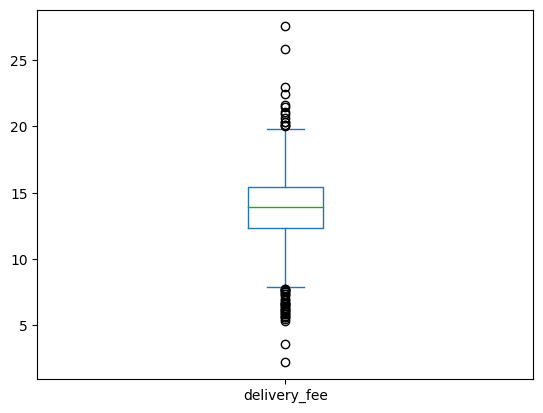

In [209]:
#Create boxplot of delivery fee
plt.figure()
df1['delivery_fee'].plot.box()
plt.show()

In [210]:
df1.describe()
#No missing delivery fee values
# The min deliver fee is $2.22; max delivery fee is $27.52; mean delivery fee is $13.77
# 3 stdv - for delivery fee - indicating outliers

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,488.152100,-37.813063,144.966939,0.036000,8.527496,13.772232
std,260.749272,0.007736,0.020148,0.186477,1.573383,3.121292
min,29.500000,-37.827984,144.919834,0.000000,3.234000,2.215453
25%,291.500000,-37.819510,144.952600,0.000000,7.730250,12.357300
50%,435.000000,-37.813705,144.964912,0.000000,8.638000,13.917436
75%,659.550000,-37.806292,144.982598,0.000000,9.609750,15.410098
max,1444.000000,-37.796916,145.018679,1.000000,12.694000,27.519940


In [211]:
df1.info()
#Full dataset
#delivery fee is a float
#df1 is in df format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 500 non-null    object 
 1   date                     500 non-null    object 
 2   time                     500 non-null    object 
 3   order_type               500 non-null    object 
 4   branch_code              500 non-null    object 
 5   order_items              500 non-null    object 
 6   order_price              500 non-null    float64
 7   customer_lat             500 non-null    float64
 8   customer_lon             500 non-null    float64
 9   customerHasloyalty?      500 non-null    int64  
 10  distance_to_customer_KM  500 non-null    float64
 11  delivery_fee             500 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


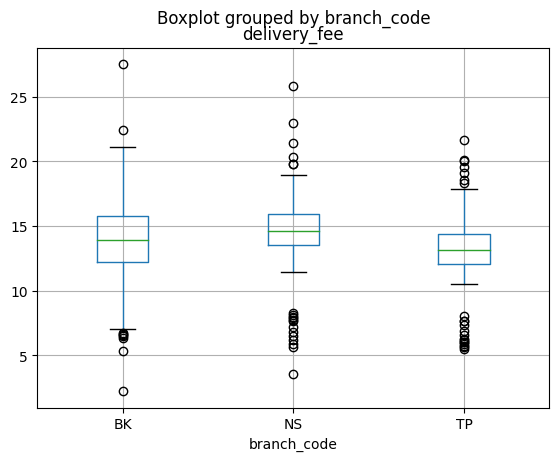

In [212]:
#Investigate outliers by Branch

bp = df1.boxplot(column='delivery_fee', by = 'branch_code')
#All branches have anomolies

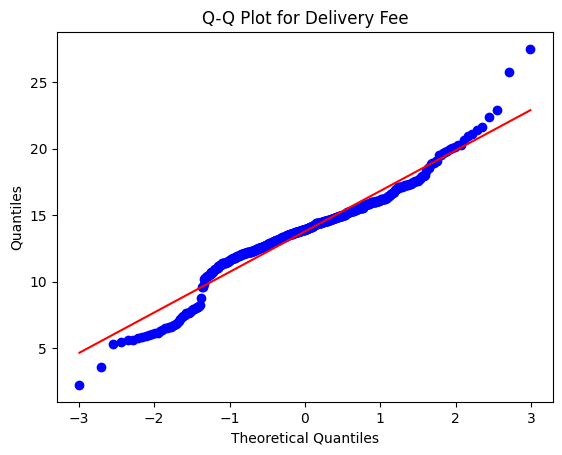

In [213]:
# Q-Q plots can help identify outliers by revealing data points that fall far from the expected pattern of the distribution.
# Create a Q-Q plot for the delivery_fee

# Create Q-Q plot with line of best fit

stats.probplot(df1['delivery_fee'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Delivery Fee')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Quantiles')
plt.show()

In [214]:
# Convert 'date' and 'time' columns to datetime
df1['date'] = pd.to_datetime(df1['date'])
df1['time'] = pd.to_datetime(df1['time'], format='%H:%M:%S').dt.time

In [215]:
# Create 'weekend' column: 1 if weekend, 0 if weekday
df1['weekend'] = df1['date'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)

In [216]:
# Create a function to get the 'time_of_day' column: 0 for morning, 1 for afternoon, 2 for evening
def get_time_of_day(time):
    if time <= pd.to_datetime('12:00:00').time():
        return 0  # Morning
    elif time <= pd.to_datetime('16:00:00').time():
        return 1  # Afternoon
    else:
        return 2  # Evening

In [217]:
#Apply the function to get the 'time_of_day' column: 0 for morning, 1 for afternoon, 2 for evening

df1['time_of_day'] = df1['time'].apply(get_time_of_day)

Even though when customerHasloyalty? ==1, the delivery is halved in price, this function will not be applied to the dataset, to prevent skewing of the results, and inteference with identifying outliers

In [218]:

# Use np.where to create the 'delivery_fee_updated' column
#df1['delivery_fee_updated'] = np.where(df1['customerHasloyalty?'] == 1, df1['delivery_fee'] * 0.5, df1['delivery_fee'])

In [219]:
# Display the first ten rows to verify the new columns
print(df1.head(32))

     order_id       date      time order_type branch_code  \
0   ORDY00750 2018-08-29  15:56:37      Lunch          TP   
1   ORDA00459 2018-10-30  17:58:18     Dinner          BK   
2   ORDZ01417 2018-10-29  17:58:18     Dinner          NS   
3   ORDC00450 2018-07-06  14:05:04      Lunch          NS   
4   ORDI10848 2018-03-11  10:11:49  Breakfast          NS   
5   ORDX07122 2018-06-19  13:34:38      Lunch          BK   
6   ORDI06596 2018-11-05  18:08:27     Dinner          NS   
7   ORDX03672 2018-07-18  14:35:29      Lunch          BK   
8   ORDJ06702 2018-11-29  18:59:09     Dinner          TP   
9   ORDK02847 2018-06-25  13:44:47      Lunch          BK   
10  ORDA11105 2018-11-21  18:49:00     Dinner          BK   
11  ORDX02116 2018-11-01  18:08:27     Dinner          BK   
12  ORDK04619 2018-11-04  18:08:27     Dinner          BK   
13  ORDI09252 2018-03-26  10:42:15  Breakfast          NS   
14  ORDX10251 2018-10-05  17:07:36     Dinner          BK   
15  ORDJ03134 2018-02-13

##CREATE SEPARATE DATAFRAMES AND MODELS FOR EACH BRANCH

In [220]:
# Group the dataframe by 'branch_code'
grouped = df1.groupby('branch_code')

In [221]:
# Create separate dataframes for each branch_code
branch_dataframes = {branch: group.copy() for branch, group in grouped}

In [222]:
# Access each dataframe and check
df_BK = branch_dataframes.get('BK')
df_BK.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekend,time_of_day
1,ORDA00459,2018-10-30,17:58:18,Dinner,BK,"[('Pasta', 6), ('Shrimp', 3), ('Salmon', 8)]",655.0,-37.806147,144.939898,0,10.123,17.146756,0,2
5,ORDX07122,2018-06-19,13:34:38,Lunch,BK,"[('Chicken', 5), ('Steak', 8), ('Fries', 7)]",604.0,-37.823344,145.006016,0,4.776,10.749032,0,1
7,ORDX03672,2018-07-18,14:35:29,Lunch,BK,"[('Fries', 6), ('Salad', 1), ('Chicken', 7)]",313.2,-37.806930,144.965933,0,7.175,13.380663,0,1
9,ORDK02847,2018-06-25,13:44:47,Lunch,BK,"[('Fries', 3), ('Burger', 5), ('Salad', 8), ('...",648.6,-37.824176,144.983483,0,6.976,13.117271,0,1
10,ORDA11105,2018-11-21,18:49:00,Dinner,BK,"[('Pasta', 5), ('Fish&Chips', 6), ('Shrimp', 3...",837.5,-37.810778,144.939145,0,9.808,17.461454,0,2


In [223]:
df_TP = branch_dataframes.get('TP')
df_TP.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekend,time_of_day
0,ORDY00750,2018-08-29,15:56:37,Lunch,TP,"[('Chicken', 10), ('Steak', 7)]",635.0,-37.813016,144.951538,0,9.073,6.260004,0,1
8,ORDJ06702,2018-11-29,18:59:09,Dinner,TP,"[('Fish&Chips', 3), ('Pasta', 10), ('Salmon', ...",773.0,-37.809274,144.957594,0,8.929,12.926673,0,2
15,ORDJ03134,2018-02-13,09:21:07,Breakfast,TP,"[('Cereal', 4), ('Eggs', 8), ('Coffee', 7)]",312.5,-37.825181,144.992487,0,9.801,19.054914,0,0
16,ORDJ10656,2018-12-01,19:09:17,Dinner,TP,"[('Pasta', 4), ('Salmon', 7)]",397.0,-37.800333,145.005593,0,12.381,17.699885,1,2
17,ORDB02498,2018-02-18,09:31:16,Breakfast,TP,"[('Pancake', 2), ('Eggs', 4), ('Coffee', 1)]",144.0,-37.807359,144.983769,0,9.882,14.082193,1,0


In [224]:
df_NS = branch_dataframes.get('NS')
df_NS.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekend,time_of_day
2,ORDZ01417,2018-10-29,17:58:18,Dinner,NS,"[('Pasta', 4), ('Shrimp', 6)]",434.0,-37.808045,144.973359,0,7.111,6.486396,0,2
3,ORDC00450,2018-07-06,14:05:04,Lunch,NS,"[('Burger', 7), ('Steak', 10), ('Chicken', 8),...",1031.0,-37.813178,144.938948,0,10.257,15.946249,0,1
4,ORDI10848,2018-03-11,10:11:49,Breakfast,NS,"[('Eggs', 7), ('Cereal', 5)]",259.0,-37.810333,144.980929,0,7.935,14.913006,1,0
6,ORDI06596,2018-11-05,18:08:27,Dinner,NS,"[('Shrimp', 4), ('Salmon', 10), ('Pasta', 6), ...",1001.0,-37.822516,144.947704,0,9.990,7.734459,0,2
13,ORDI09252,2018-03-26,10:42:15,Breakfast,NS,"[('Coffee', 2), ('Eggs', 7)]",169.0,-37.801373,144.974314,0,6.472,11.486437,0,0


In [225]:
#Fit a linear regression model
#Feature Selection: The features relevant for the regression analysis are selected,
# includes:Branch, weekend, time of day, distance to the customer in kilometers.

features = ['weekend', 'time_of_day', 'distance_to_customer_KM', 'branch_code']

In [226]:
# Use OneHotEncoder for categorical variable
categorical_features = ['branch_code']
numeric_features = ['weekend', 'time_of_day', 'distance_to_customer_KM']

In [227]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

In [228]:
# Create a pipeline with the preprocessor and linear regression model
pipeline_BK = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

##Apply the model to each dataframe, for each branch

In [229]:
X_BK = df_BK[features]
y_BK = df_BK['delivery_fee']

In [230]:
# Fit the pipeline
pipeline_BK.fit(X_BK, y_BK)
y_BK_pred = pipeline_BK.predict(X_BK)


##Residuals
Ordinary residuals are defined for each observation, i = 1, ..., n as the difference between the observed and predicted responses.

With ordinary residuals, their magnitude depends on the units of measurement, making it difficult to use the residuals as a way of detecting unusual y values.

By dividing the residuals by an estimate of their standard deviation, thereby obtaining what are known as standardized residuals, this can be eliminated.

Standardised residuals quantify how large the residuals are in standard deviation units, and therefore can be easily used to identify outlier.

An observation with a standardised residual that is larger than 3 (in absolute value) is deemed by some to be an outlier.

In cases where outliers will have a significant impact, and where a conservative approach is required, a cut off of 2 can also be used.

However, for identifying delivery fee outliers, a cut of 3 standard deviation will suffice.

In [231]:
#Calculate the standard deviation of the residuals

residuals_BK = y_BK - y_BK_pred
std_residuals_BK = np.std(residuals_BK)

In [232]:
# Calculate the upper and lower bounds
Y2 = y_BK_pred + 3 * std_residuals_BK
Y3 = y_BK_pred - 3 * std_residuals_BK

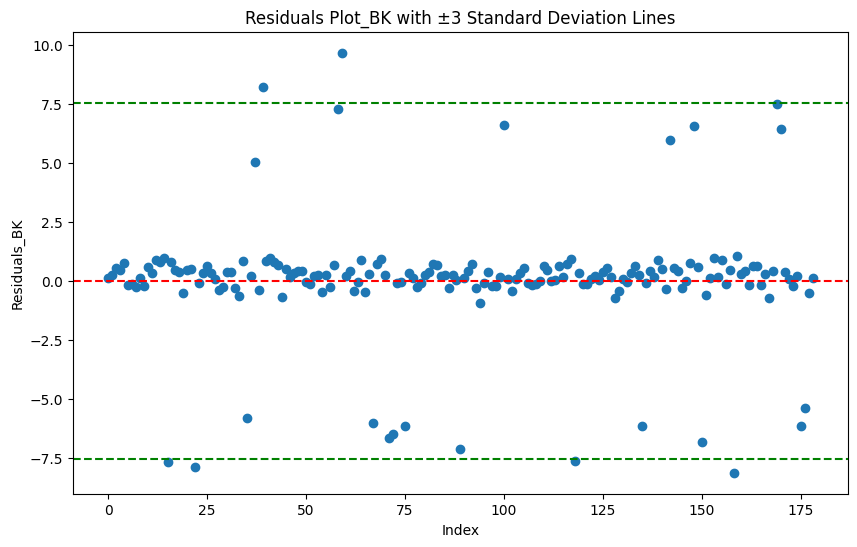

In [233]:
# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals_BK)), residuals_BK, label='Residuals_BK')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line_BK')
plt.axhline(y=3*std_residuals_BK, color='g', linestyle='--', label='+3 Std Dev')
plt.axhline(y=-3*std_residuals_BK, color='g', linestyle='--', label='-3 Std Dev')
plt.xlabel('Index')
plt.ylabel('Residuals_BK')
plt.title('Residuals Plot_BK with ±3 Standard Deviation Lines')
plt.show()

In [234]:
# Identify and display outliers
outliers_mask_BK = (residuals_BK > 3*std_residuals_BK) | (residuals_BK < -3*std_residuals_BK)
outliers_BK = df_BK[outliers_mask_BK]
outliers_BK

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekend,time_of_day
44,ORDA02609,2018-01-28,08:50:42,Breakfast,BK,"[('Pancake', 4), ('Eggs', 9), ('Coffee', 7)]",347.5,-37.821023,144.955056,0,8.588,7.754357,1,0
58,ORDK06631,2018-07-26,14:45:38,Lunch,BK,"[('Fries', 3), ('Steak', 9), ('Chicken', 1), (...",734.6,-37.806235,144.933584,0,10.242,7.951968,0,1
124,ORDX07767,2018-06-08,13:14:21,Lunch,BK,"[('Chicken', 9), ('Steak', 5), ('Fries', 4)]",561.0,-37.804856,144.951306,0,8.557,22.392451,0,1
179,ORDX10531,2018-12-21,19:39:43,Dinner,BK,"[('Pasta', 1), ('Shrimp', 2)]",135.5,-37.814828,144.932784,0,10.978,27.519940,0,2
336,ORDA10911,2018-12-09,19:19:26,Dinner,BK,"[('Fish&Chips', 8), ('Shrimp', 4), ('Pasta', 8)]",716.0,-37.817529,144.995960,0,5.073,7.003107,1,2
445,ORDK05070,2018-09-18,16:37:10,Dinner,BK,"[('Salmon', 5), ('Pasta', 2), ('Shrimp', 10), ...",940.0,-37.812742,144.943442,0,9.368,8.154539,0,2


In [ ]:
#REPEAT TO IDENTIFY OUTLIERS IN EACH BRANCH

In [235]:
# Create a pipeline with the preprocessor and linear regression model
pipeline_TP = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [236]:
X_TP = df_TP[features]
y_TP = df_TP['delivery_fee']

In [237]:
# Fit the pipeline
pipeline_TP.fit(X_TP, y_TP)
y_TP_pred = pipeline_TP.predict(X_TP)

In [238]:
# Calculate the residuals and standard deviation of the residuals
residuals_TP = y_TP - y_TP_pred
std_residuals_TP = np.std(residuals_TP)

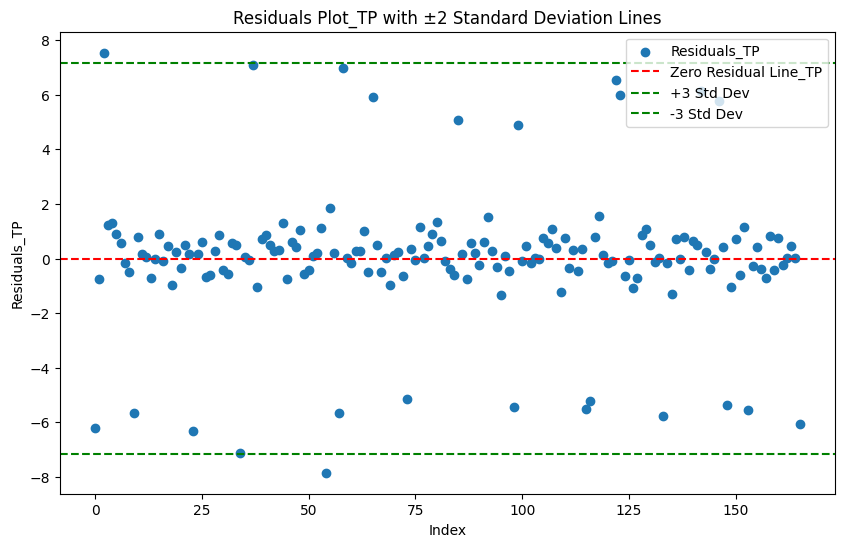

In [239]:
# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals_TP)), residuals_TP, label='Residuals_TP')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line_TP')
plt.axhline(y=3*std_residuals_TP, color='g', linestyle='--', label='+3 Std Dev')
plt.axhline(y=-3*std_residuals_TP, color='g', linestyle='--', label='-3 Std Dev')
plt.xlabel('Index')
plt.ylabel('Residuals_TP')
plt.legend()
plt.title('Residuals Plot_TP with ±2 Standard Deviation Lines')
plt.show()

In [241]:
# Identify and display outliers
outliers_mask = (residuals_TP > 3*std_residuals_TP) | (residuals_TP < -3*std_residuals_TP)
outliers_TP = df_TP[outliers_mask]
outliers_TP

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekend,time_of_day
15,ORDJ03134,2018-02-13,09:21:07,Breakfast,TP,"[('Cereal', 4), ('Eggs', 8), ('Coffee', 7)]",312.5,-37.825181,144.992487,0,9.801,19.054914,0,0
163,ORDJ06712,2018-09-16,16:37:10,Dinner,TP,"[('Shrimp', 8), ('Fish&Chips', 1), ('Salmon', ...",904.5,-37.814104,144.973636,0,8.541,6.887308,1,2


In [242]:
#Outliers for Branch NP

In [243]:
# Create a pipeline with the preprocessor and linear regression model
pipeline_NS = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
  ])

In [244]:
X_NS = df_NS[features]
y_NS = df_NS['delivery_fee']

In [245]:
# Fit the pipeline
pipeline_NS.fit(X_NS, y_NS)
y_NS_pred = pipeline_NS.predict(X_NS)

In [246]:
# Calculate the residuals and standard deviation of the residuals
residuals_NS = y_NS - y_NS_pred
std_residuals_NS = np.std(residuals_NS)

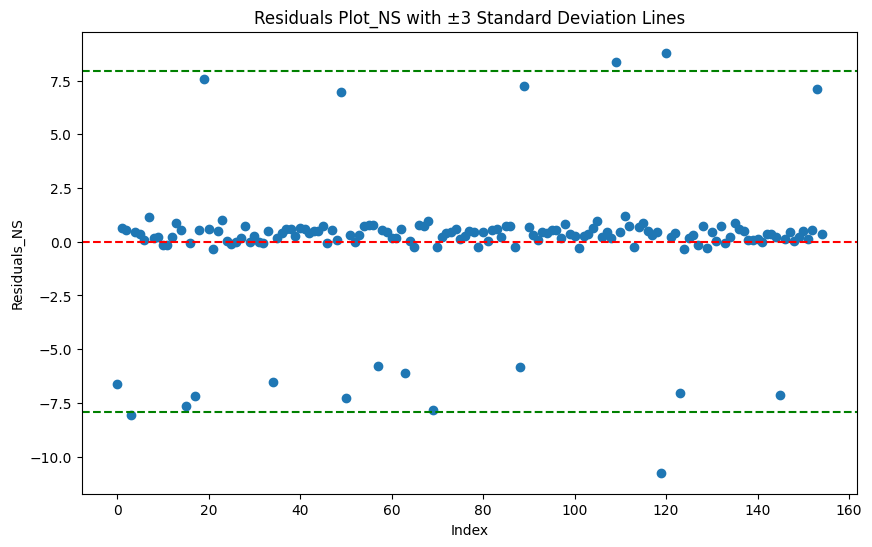

In [247]:
# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals_NS)), residuals_NS, label='Residuals_NS')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line_NS')
plt.axhline(y=3*std_residuals_NS, color='g', linestyle='--', label='+3 Std Dev')
plt.axhline(y=-3*std_residuals_NS, color='g', linestyle='--', label='-3 Std Dev')
plt.xlabel('Index')
plt.ylabel('Residuals_NS')
plt.title('Residuals Plot_NS with ±3 Standard Deviation Lines')
plt.show()

In [248]:
# Identify and display outliers
outliers_mask = (residuals_NS > 3*std_residuals_NS) | (residuals_NS < -3*std_residuals_NS)
outliers_NS = df_NS[outliers_mask]


In [249]:
#CHECK
outliers_NS.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekend,time_of_day
6,ORDI06596,2018-11-05,18:08:27,Dinner,NS,"[('Shrimp', 4), ('Salmon', 10), ('Pasta', 6), ...",1001.00,-37.822516,144.947704,0,9.990,7.734459,0,2
340,ORDI00402,2018-01-24,08:40:33,Breakfast,NS,"[('Coffee', 9), ('Cereal', 5)]",172.50,-37.827984,144.955002,0,10.224,22.923335,0,0
380,ORDI06428,2018-01-10,08:10:08,Breakfast,NS,"[('Pancake', 7), ('Eggs', 9)]",367.75,-37.815741,144.938320,1,9.976,3.579805,0,0
381,ORDZ04498,2018-11-10,18:18:35,Dinner,NS,"[('Shrimp', 7), ('Fish&Chips', 9), ('Pasta', 1...",1009.00,-37.820647,144.983535,0,9.181,25.779881,1,2


In [250]:
#Combine outliers datasets
outliers_NSDS= pd.concat([outliers_BK, outliers_TP, outliers_NS], axis=0)

In [251]:
#CHECK DATASET
outliers_NSDS

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekend,time_of_day
44,ORDA02609,2018-01-28,08:50:42,Breakfast,BK,"[('Pancake', 4), ('Eggs', 9), ('Coffee', 7)]",347.50,-37.821023,144.955056,0,8.588,7.754357,1,0
58,ORDK06631,2018-07-26,14:45:38,Lunch,BK,"[('Fries', 3), ('Steak', 9), ('Chicken', 1), (...",734.60,-37.806235,144.933584,0,10.242,7.951968,0,1
124,ORDX07767,2018-06-08,13:14:21,Lunch,BK,"[('Chicken', 9), ('Steak', 5), ('Fries', 4)]",561.00,-37.804856,144.951306,0,8.557,22.392451,0,1
179,ORDX10531,2018-12-21,19:39:43,Dinner,BK,"[('Pasta', 1), ('Shrimp', 2)]",135.50,-37.814828,144.932784,0,10.978,27.519940,0,2
336,ORDA10911,2018-12-09,19:19:26,Dinner,BK,"[('Fish&Chips', 8), ('Shrimp', 4), ('Pasta', 8)]",716.00,-37.817529,144.995960,0,5.073,7.003107,1,2
445,ORDK05070,2018-09-18,16:37:10,Dinner,BK,"[('Salmon', 5), ('Pasta', 2), ('Shrimp', 10), ...",940.00,-37.812742,144.943442,0,9.368,8.154539,0,2
15,ORDJ03134,2018-02-13,09:21:07,Breakfast,TP,"[('Cereal', 4), ('Eggs', 8), ('Coffee', 7)]",312.50,-37.825181,144.992487,0,9.801,19.054914,0,0
163,ORDJ06712,2018-09-16,16:37:10,Dinner,TP,"[('Shrimp', 8), ('Fish&Chips', 1), ('Salmon', ...",904.50,-37.814104,144.973636,0,8.541,6.887308,1,2
6,ORDI06596,2018-11-05,18:08:27,Dinner,NS,"[('Shrimp', 4), ('Salmon', 10), ('Pasta', 6), ...",1001.00,-37.822516,144.947704,0,9.990,7.734459,0,2
340,ORDI00402,2018-01-24,08:40:33,Breakfast,NS,"[('Coffee', 9), ('Cereal', 5)]",172.50,-37.827984,144.955002,0,10.224,22.923335,0,0


In [252]:
#Created function to extract order_id from outliers_NSDS dataframe
def remove_outliers(df, outliers_df, id_column='order_id'):
    # Extract the order IDs from the outliers DataFrame
    outlier_order_ids = outliers_df[id_column].tolist()

    # Remove rows with these order IDs from the main DataFrame
    df_cleaned = df[~df[id_column].isin(outlier_order_ids)]

    return df_cleaned

In [253]:
#Apply the function to df1
df1_cleaned = remove_outliers(df1, outliers_NSDS)

In [254]:
#Check outliers rows have been removed from the dataset
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 488 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 488 non-null    object        
 1   date                     488 non-null    datetime64[ns]
 2   time                     488 non-null    object        
 3   order_type               488 non-null    object        
 4   branch_code              488 non-null    object        
 5   order_items              488 non-null    object        
 6   order_price              488 non-null    float64       
 7   customer_lat             488 non-null    float64       
 8   customer_lon             488 non-null    float64       
 9   customerHasloyalty?      488 non-null    int64         
 10  distance_to_customer_KM  488 non-null    float64       
 11  delivery_fee             488 non-null    float64       
 12  weekend                  488 non-null    

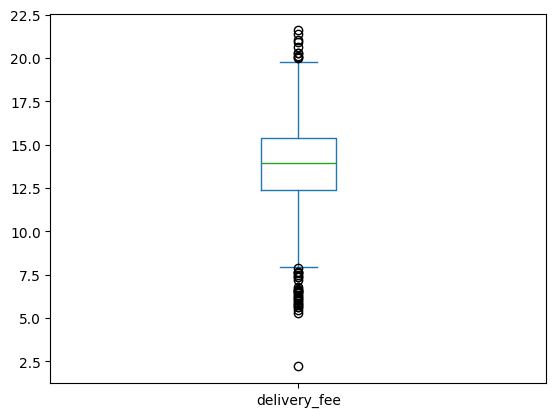

In [255]:
#Create boxplot of updated delivery fee values to check the removal of outliers.
plt.figure()
df1_cleaned['delivery_fee'].plot.box()
plt.show()

In [256]:
df1_cleaned.describe()

,date,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekend,time_of_day
count,488,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,2018-07-08 09:50:09.836065536,485.397951,-37.812967,144.967145,0.034836,8.510715,13.769221,0.268443,1.036885
min,2018-01-01 00:00:00,29.500000,-37.827984,144.919834,0.000000,3.234000,2.215453,0.000000,0.000000
25%,2018-04-12 00:00:00,289.950000,-37.819285,144.952840,0.000000,7.713250,12.419001,0.000000,0.000000
50%,2018-07-10 12:00:00,433.875000,-37.813524,144.965167,0.000000,8.627500,13.932552,0.000000,1.000000
75%,2018-10-11 06:00:00,655.125000,-37.806261,144.982598,0.000000,9.526000,15.399019,1.000000,2.000000
max,2018-12-31 00:00:00,1444.000000,-37.796916,145.018679,1.000000,12.694000,21.606244,1.000000,2.000000
std,NaN,258.746389,0.007734,0.020070,0.183553,1.572610,2.868484,0.443604,0.827326


#CONCLUSION FOR OUTLIERS

Outliers increase the variability in your data, which decreases statistical power.

Using standardised residuals, with a cut off of 3 standard deviation, 12 outliers (2.4%) have been identified in the data set, which is roughly on par with an average datasets available.

The boxplot for the cleaned data shows the removal of the outliers to our specified standard.

Importantly, the discount variable for loyalty had been not been computed when identifying outliers, as this would identify false outliers, and thus lead to dataloss for performing analysis on the dataset.

##Download datafile

In [257]:
df1_cleaned.to_csv('105_outlier_data_solution.csv', index = False)

In [258]:
from google.colab import files

<div class="alert alert-block alert-success">
    
# 6.  Task 2 <a class="anchor" name="task2"></a>


In [259]:
sb_info_df.head()

,number_of_houses,number_of_units,municipality,aus_born_perc,median_income,median_house_price,population
suburb,,,,,,,
ABBOTSFORD,2304,4706,Yarra,68.0,1797,1299400,4025
ABERFELDIE,1410,453,Moonee Valley,81.0,1571,1926600,22442
ALBANVALE,1897,138,Brimbank,46.0,907,594200,54005
ALBION,1389,1392,Brimbank,52.0,929,739100,30677
ALPHINGTON,1729,1099,Darebin,73.0,1538,1729600,9227


In [260]:
sb_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, ABBOTSFORD to YARRAVILLE
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   number_of_houses    202 non-null    int64  
 1   number_of_units     202 non-null    int64  
 2   municipality        202 non-null    object 
 3   aus_born_perc       202 non-null    float64
 4   median_income       202 non-null    object 
 5   median_house_price  202 non-null    object 
 6   population          202 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 20.7+ KB


In [262]:
sb_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, ABBOTSFORD to YARRAVILLE
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   number_of_houses    202 non-null    int64  
 1   number_of_units     202 non-null    int64  
 2   municipality        202 non-null    object 
 3   aus_born_perc       202 non-null    float64
 4   median_income       202 non-null    object 
 5   median_house_price  202 non-null    object 
 6   population          202 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 20.7+ KB


In [263]:
sb_info_df.head()

,number_of_houses,number_of_units,municipality,aus_born_perc,median_income,median_house_price,population
suburb,,,,,,,
ABBOTSFORD,2304,4706,Yarra,68.0,1797,1299400,4025
ABERFELDIE,1410,453,Moonee Valley,81.0,1571,1926600,22442
ALBANVALE,1897,138,Brimbank,46.0,907,594200,54005
ALBION,1389,1392,Brimbank,52.0,929,739100,30677
ALPHINGTON,1729,1099,Darebin,73.0,1538,1729600,9227


This will show the relationship between all the varibles.

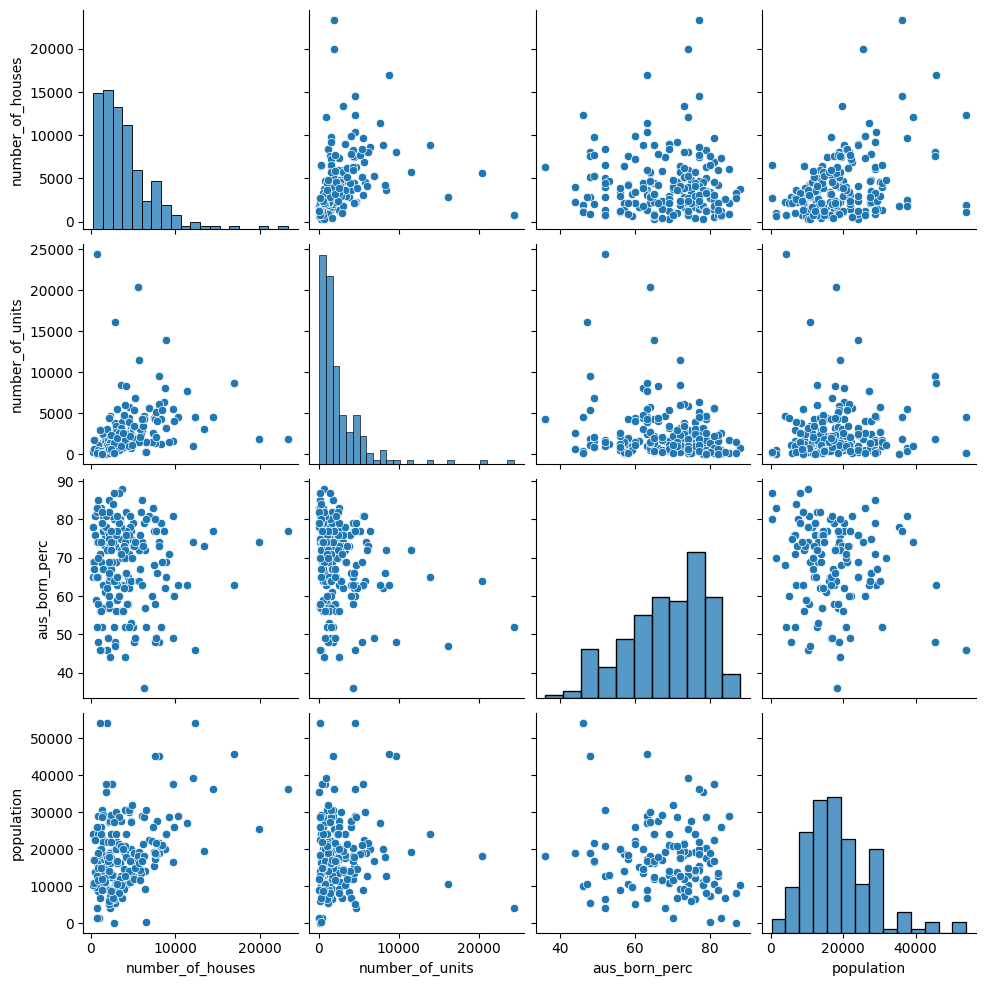

In [96]:
sns.pairplot(sb_info_df)

#Observations for MEDIAN HOUSE PRICE relationship with:

##•	Number of Houses
o	There is a spread of data points indicating variability but no clear linear trend.
o	The histogram for number of houses, shows a positively skewed distribution.
##•	Number of Units
o	There is a spread of data for median house price and number of units, with a greater concentration of units having a correlation with lower house price.
o	The histogram for number of units again shows an even greater positively skewed distribution.

##•	Australian-born Percentage (aus_born_perc)
o	There is spread of data for Australian born percentage and median house price, with a slightly positive correlation observable.
o	The histogram for Australian-born percentage shows a slightly negatively skewed distribution.

##•	Population
o	There is a spread of data points in the scatter graph for population vs median house price, with a slightly negative correlation observable.
o	The histogram for population shows a slightly positively skewed distribution.

##•	Median Income
o	A positive correlation can be observed between median house price and median income.
o	A roughly normal (but very slightly positively skewed) distribution can be observed for median income.


Futher transaformation & scaling is required to create a more linear relation between the varibles.

<div class="alert alert-block alert-success">
    
## 5.1  Standradization <a class="anchor" name="task2.1"></a>


Standardized data retains the original relationships but scales them to have a mean of 0 and standard deviation of 1.

In [272]:
selected_columns = ['aus_born_perc', 'median_income', 'median_house_price', 'population', 'number_of_houses','number_of_units']

selected_df = sb_info_df[selected_columns].copy()

In [273]:
selected_df.info()

selected_df = selected_df.apply(pd.to_numeric, errors='coerce')

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, ABBOTSFORD to YARRAVILLE
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   aus_born_perc       202 non-null    float64
 1   median_income       202 non-null    object 
 2   median_house_price  202 non-null    object 
 3   population          202 non-null    int64  
 4   number_of_houses    202 non-null    int64  
 5   number_of_units     202 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 19.1+ KB


In [274]:
scaler = StandardScaler()
scaled_columns = scaler.fit_transform(selected_df)
standardized_df = pd.DataFrame(scaled_columns, columns=selected_columns, index=sb_info_df.index)

In [275]:
standardized_df.head()

,aus_born_perc,median_income,median_house_price,population,number_of_houses,number_of_units
suburb,,,,,,
ABBOTSFORD,-0.034127,1.290206,0.171267,-1.527529,-0.545852,0.712207
ABERFELDIE,1.176908,0.577392,1.504284,0.394837,-0.809379,-0.648788
ALBANVALE,-2.083570,-1.516891,-1.327527,3.689381,-0.665824,-0.749590
ALBION,-1.524631,-1.447502,-1.019564,1.254406,-0.815569,-0.348300
ALPHINGTON,0.431656,0.473309,1.085591,-0.984544,-0.715346,-0.442063


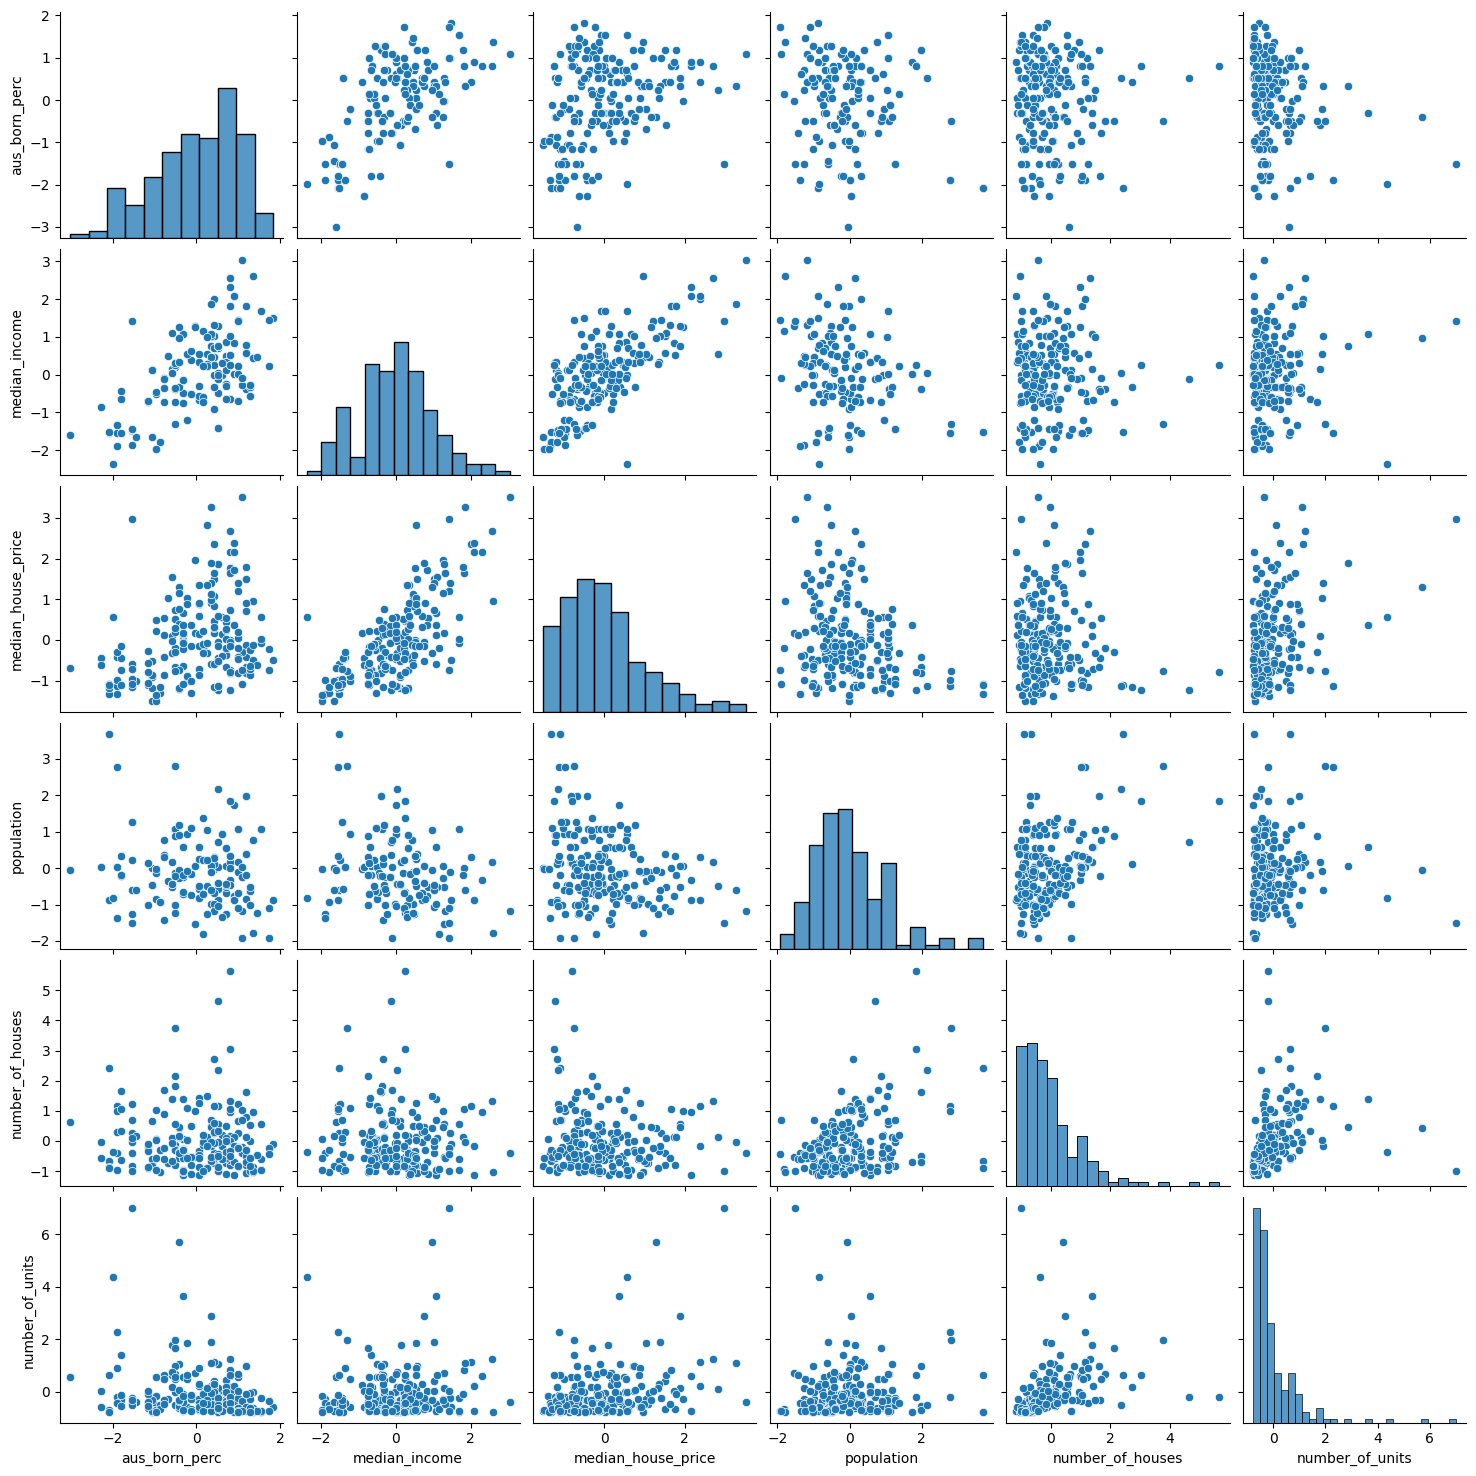

In [268]:
sns.pairplot(standardized_df)

<div class="alert alert-block alert-success">
    
## 5.2 Mix-Max Transformation <a class="anchor" name="task2.2"></a>



Min-max data scales features to a range [0, 1], which can highlight relationships differently.

In [276]:
min_max_scaler = MinMaxScaler()

normalized_columns = min_max_scaler.fit_transform(sb_info_df[selected_columns])
min_max_df = pd.DataFrame(normalized_columns, columns=selected_columns, index=sb_info_df.index)


In [277]:
min_max_df.head()

,aus_born_perc,median_income,median_house_price,population,number_of_houses,number_of_units
suburb,,,,,,
ABBOTSFORD,0.615385,0.677138,0.334459,0.071608,0.087660,0.191036
ABERFELDIE,0.865385,0.545666,0.599257,0.413709,0.048883,0.016160
ALBANVALE,0.192308,0.159395,0.036731,1.000000,0.070007,0.003207
ALBION,0.307692,0.172193,0.097906,0.566676,0.047972,0.054770
ALPHINGTON,0.711538,0.526469,0.516085,0.168236,0.062720,0.042722


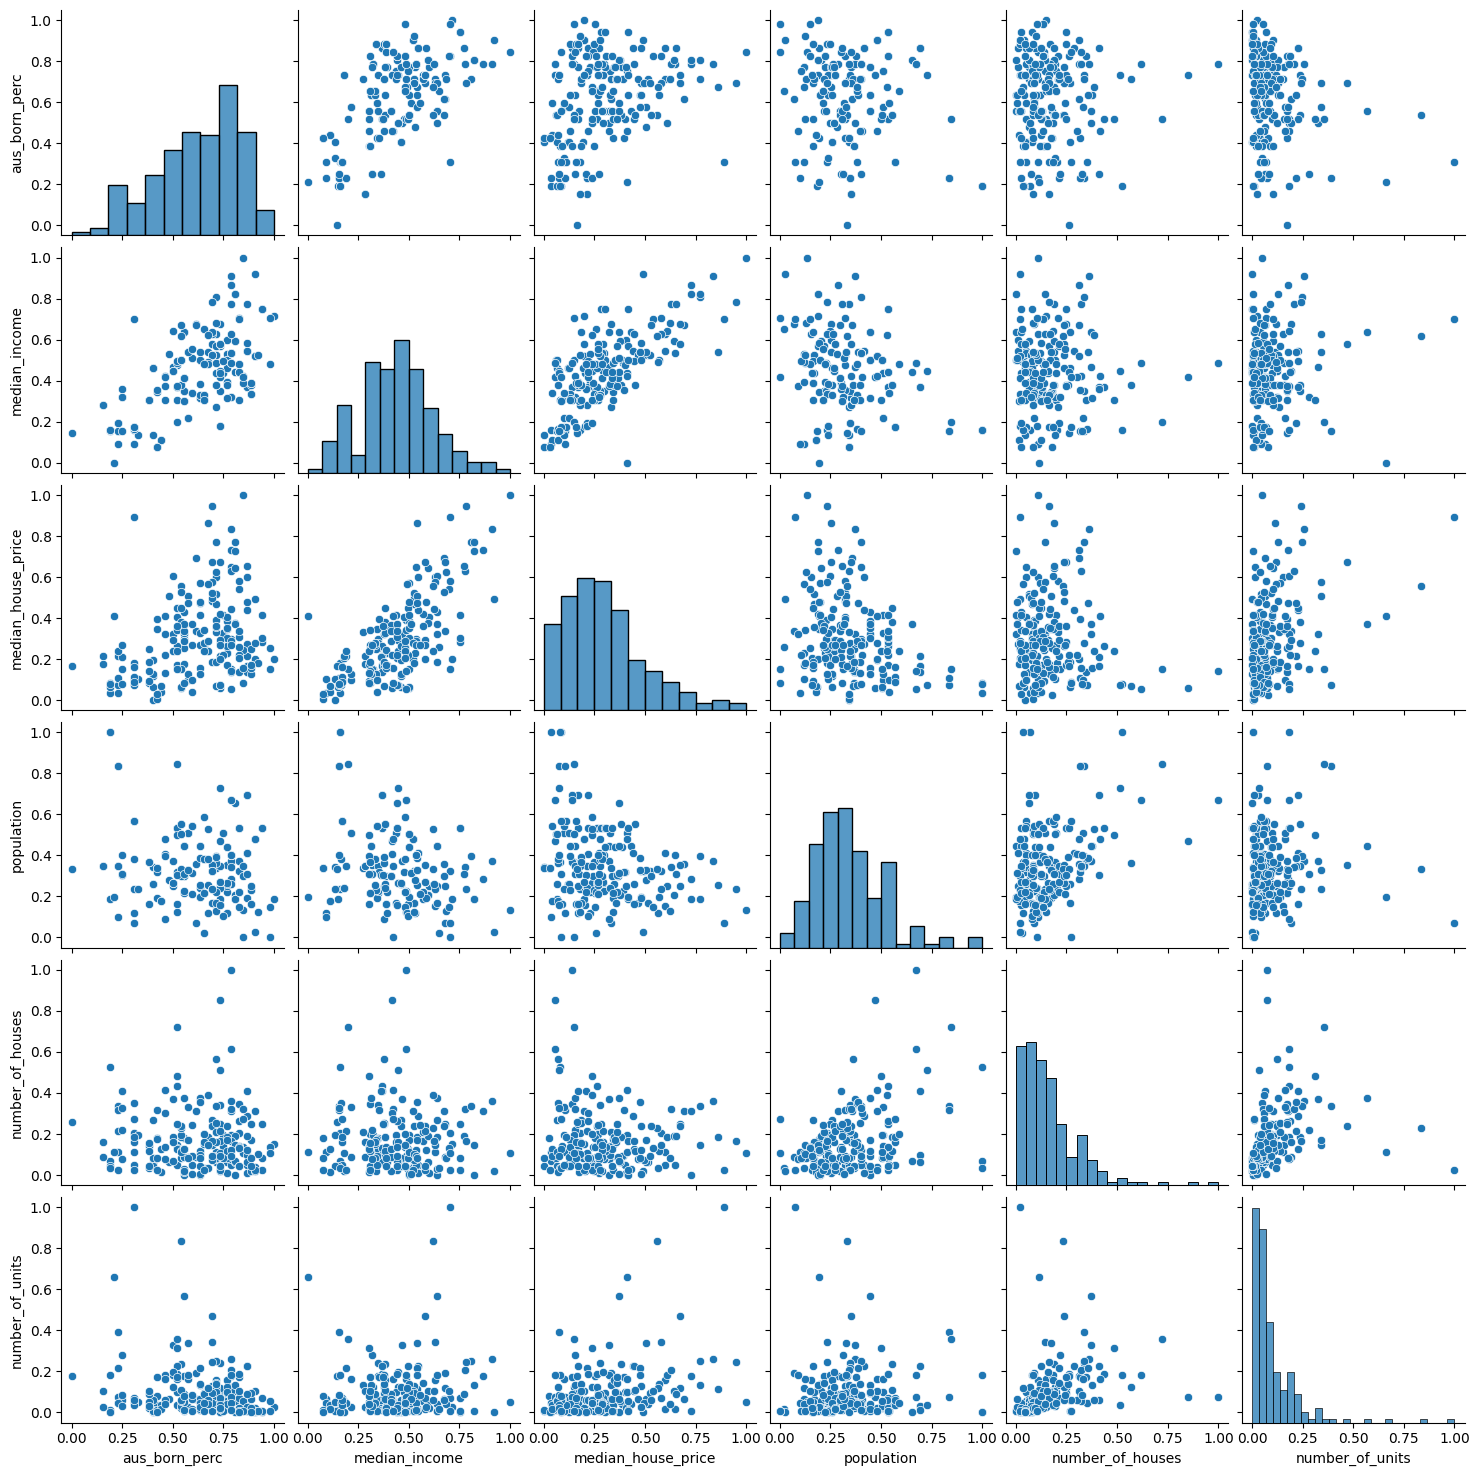

In [278]:
sns.pairplot(min_max_df)

<div class="alert alert-block alert-success">
    
## 5.3 Power Transformation <a class="anchor" name="task2.3"></a>



In [279]:
power_transformer = PowerTransformer(method='yeo-johnson')

power_transformed_data = power_transformer.fit_transform(selected_df)
power_transformed_df = pd.DataFrame(power_transformed_data, columns=selected_df.columns, index=selected_df.index)

In [280]:
power_transformed_df.head()

,aus_born_perc,median_income,median_house_price,population,number_of_houses,number_of_units
suburb,,,,,,
ABBOTSFORD,-0.154763,1.270278,0.393441,-1.896227,-0.408454,1.074274
ABERFELDIE,1.290449,0.596187,1.396578,0.496829,-0.952151,-0.941846
ALBANVALE,-1.813103,-1.561713,-1.844805,2.914635,-0.629519,-1.757075
ALBION,-1.451781,-1.484582,-1.185648,1.228272,-0.968009,-0.049173
ALPHINGTON,0.357500,0.495658,1.129506,-1.014607,-0.732247,-0.247819


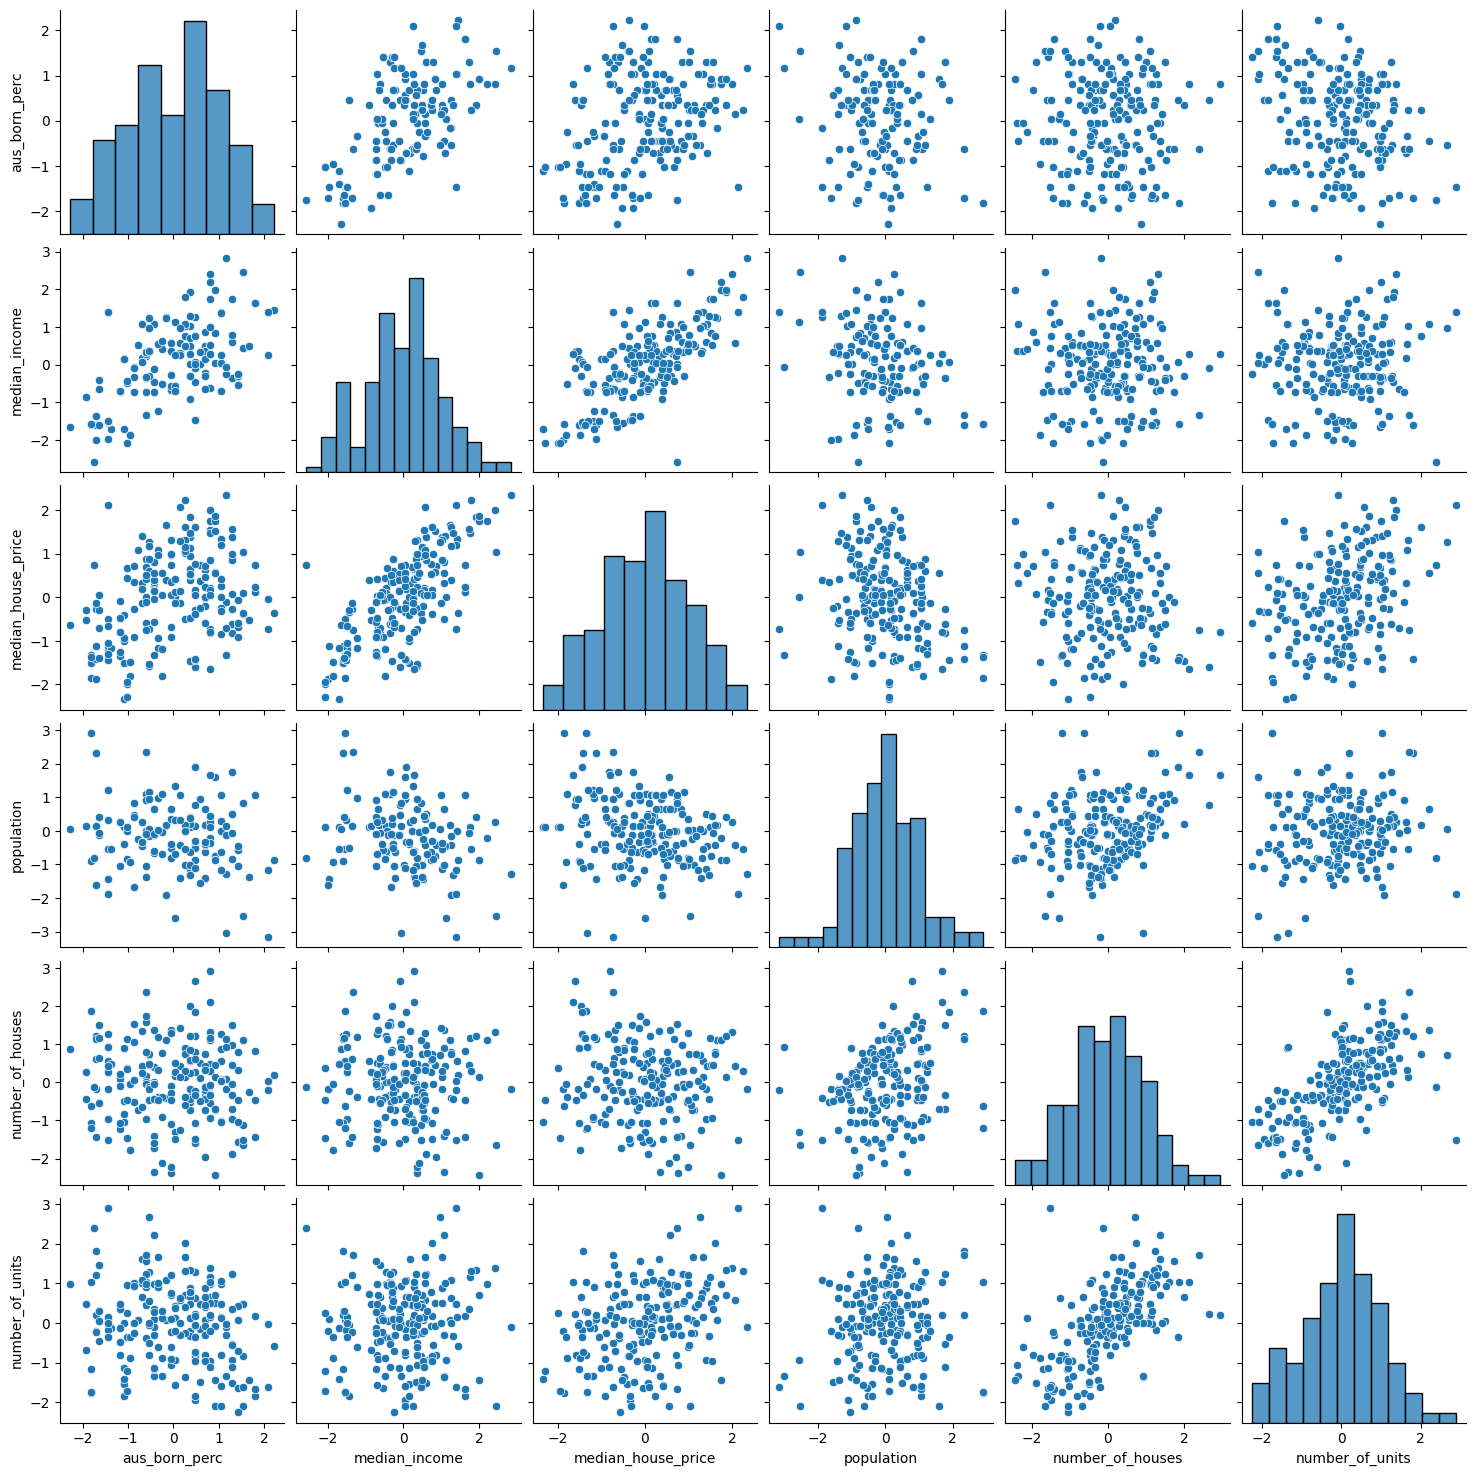

In [107]:
sns.pairplot(power_transformed_df)

In [281]:
power_transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, ABBOTSFORD to YARRAVILLE
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   aus_born_perc       202 non-null    float64
 1   median_income       202 non-null    float64
 2   median_house_price  202 non-null    float64
 3   population          202 non-null    float64
 4   number_of_houses    202 non-null    float64
 5   number_of_units     202 non-null    float64
dtypes: float64(6)
memory usage: 19.1+ KB


<div class="alert alert-block alert-success">
    
## 5.4 Log Transformation <a class="anchor" name="task2.4"></a>


In [282]:
log_transformed_data = np.log1p(selected_df)

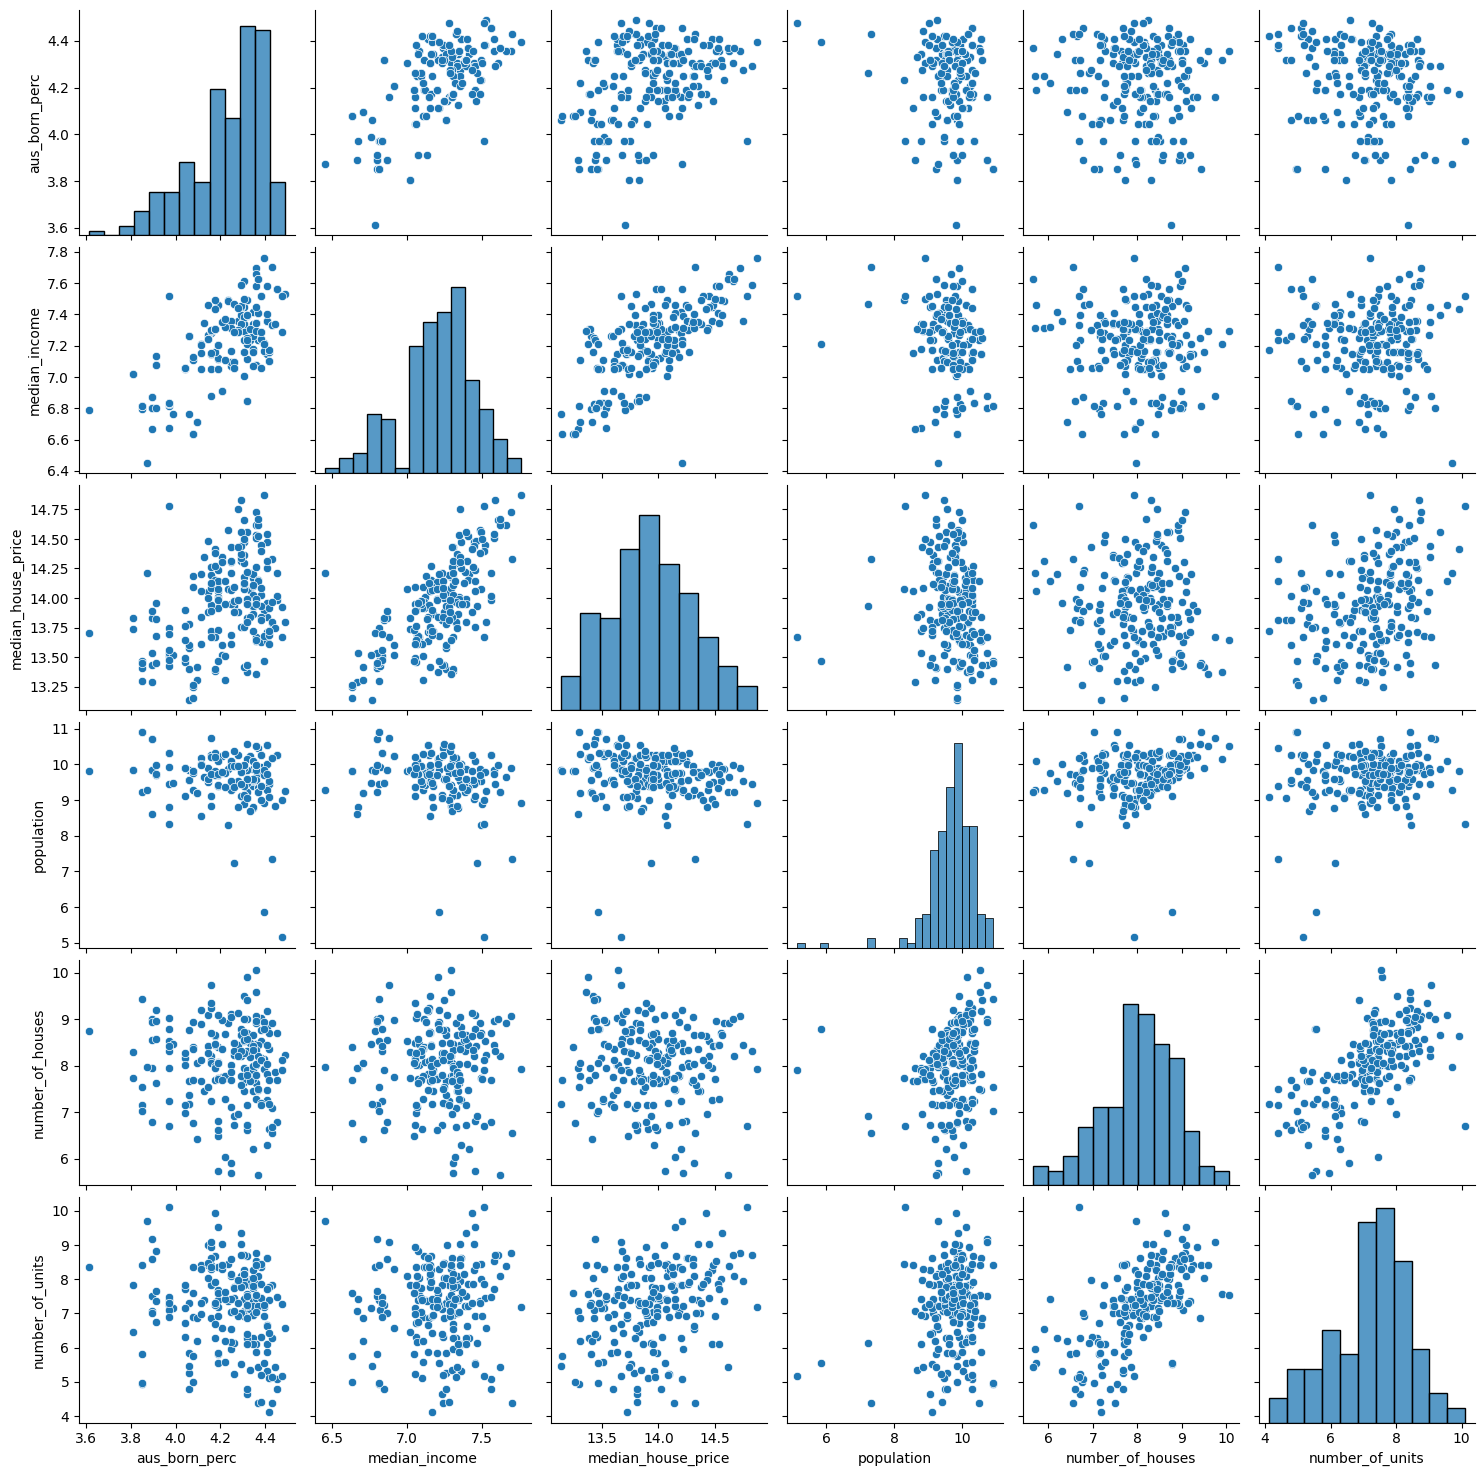

In [108]:
sns.pairplot(log_transformed_data)

In [283]:
log_transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, ABBOTSFORD to YARRAVILLE
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   aus_born_perc       202 non-null    float64
 1   median_income       202 non-null    float64
 2   median_house_price  202 non-null    float64
 3   population          202 non-null    float64
 4   number_of_houses    202 non-null    float64
 5   number_of_units     202 non-null    float64
dtypes: float64(6)
memory usage: 19.1+ KB


<div class="alert alert-block alert-success">
    
## 5.5 Box-Cox Transformation <a class="anchor" name="task2.5"></a>

In [284]:
# Applying Box-Cox transformation using PowerTransformer
power_transformer = PowerTransformer(method='box-cox')

power_transformed_data = power_transformer.fit_transform(selected_df)
power_transformed_df_box_cox = pd.DataFrame(power_transformed_data, columns=selected_df.columns, index=selected_df.index)

In [285]:
power_transformed_df_box_cox.head()

,aus_born_perc,median_income,median_house_price,population,number_of_houses,number_of_units
suburb,,,,,,
ABBOTSFORD,-0.154494,1.270274,0.393441,-1.896159,-0.408424,1.074045
ABERFELDIE,1.290232,0.596186,1.396578,0.496815,-0.952056,-0.941337
ALBANVALE,-1.813536,-1.561714,-1.844805,2.914715,-0.629460,-1.757211
ALBION,-1.452109,-1.484582,-1.185648,1.228269,-0.967912,-0.049174
ALPHINGTON,0.357771,0.495658,1.129506,-1.014589,-0.732175,-0.247705


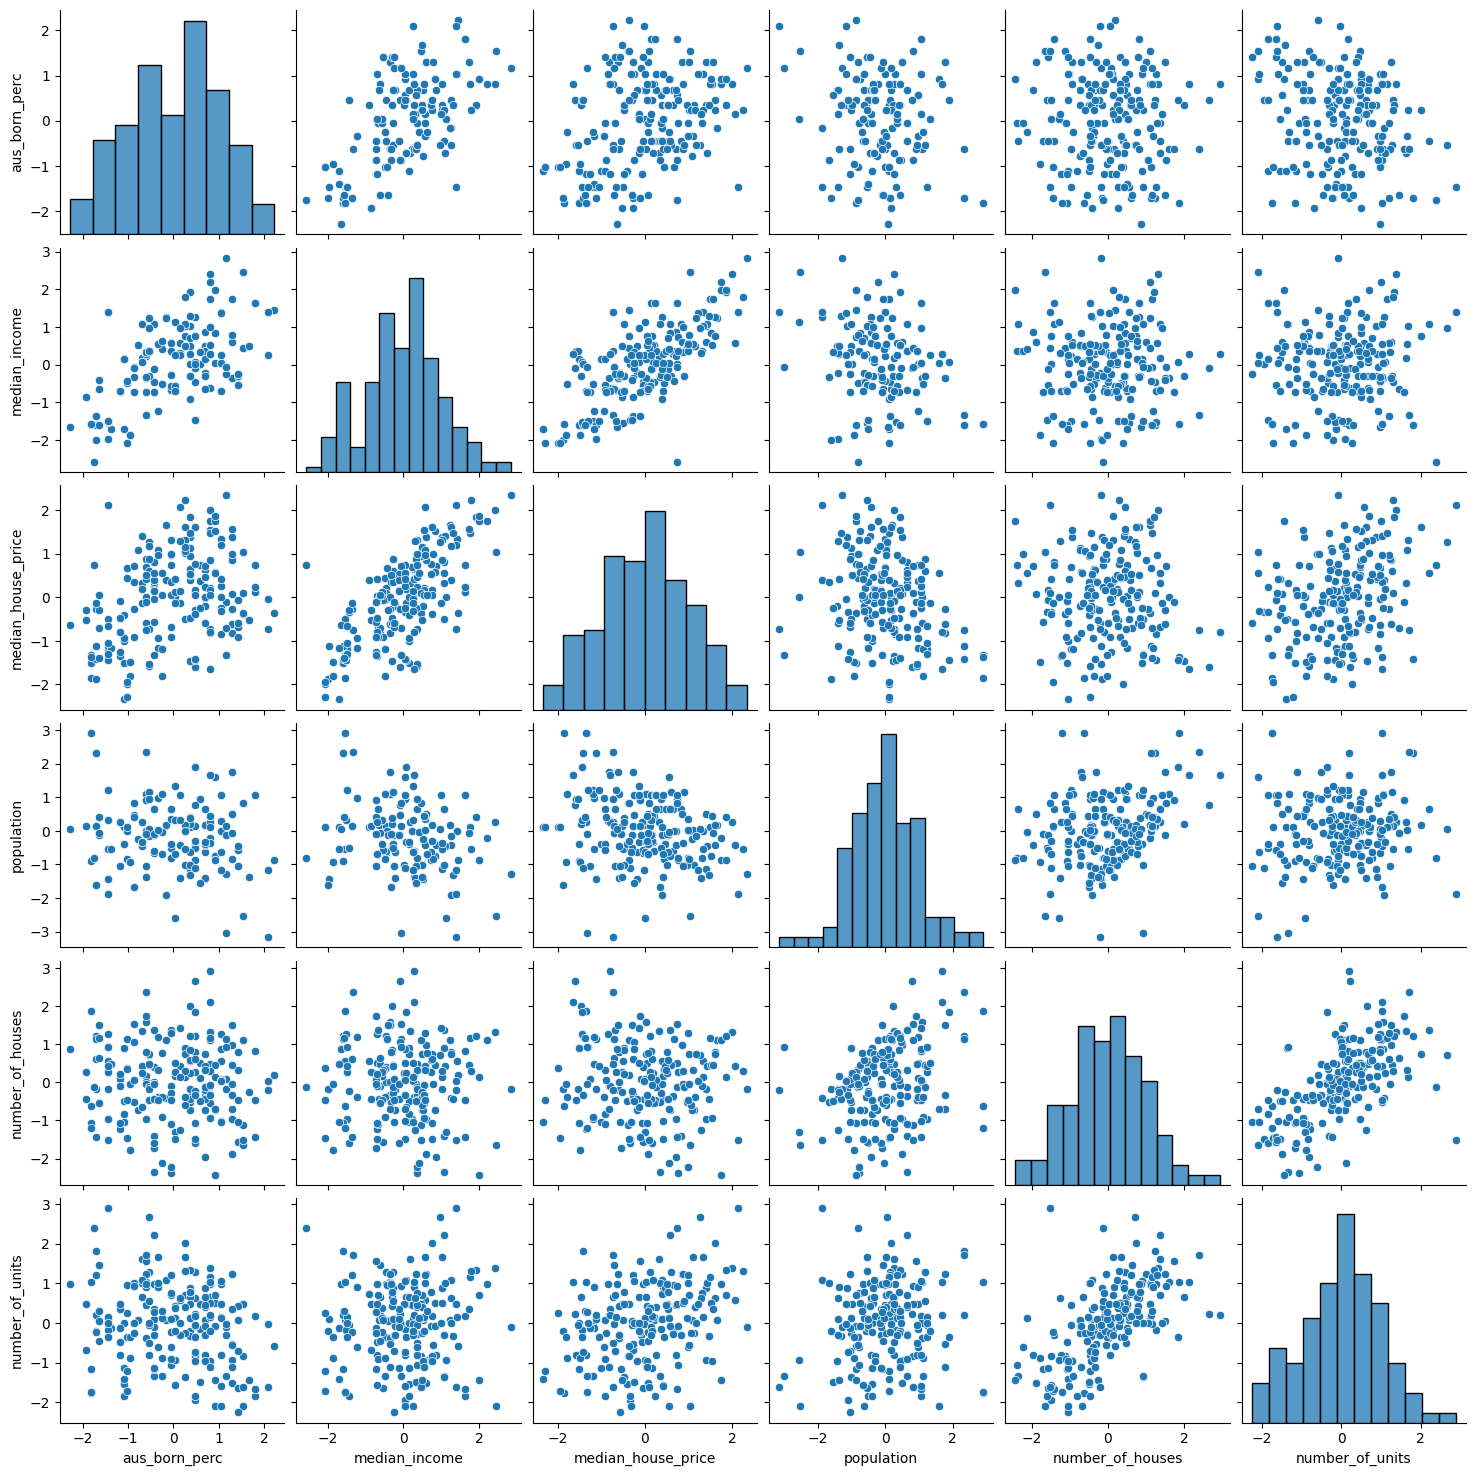

In [110]:
# Visualising the transformed data
sns.pairplot(power_transformed_df)
plt.show()

#ANALYSIS

We want our features to have as much linear
 relationship as possible with the target variable (i.e., median_house_price).

Checking linearity is important because if the relationship is not linear, the linear regression model will not fit the data well, and the estimates of the coefficients and the predictions will be biased and inaccurate.


Linear Regression Analysis can be carried out to check the linearity between Median_house_price and the variables.

In [ ]:
#Linear Regression will be calculated for median_income

In [299]:
# Perform linear regression and calculate R-squared values
results = {}

for name, df in dataframes.items():
    X = df.drop(columns=['median_house_price'])
    y = df['median_house_price']
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    results[name] = {
        'R-squared': r2,
        'Coefficients': model.coef_,
        'Intercept': model.intercept_
    }
    print(f"R-squared for {name} Transformation: {r2}")

R-squared for Standardized Transformation: 0.6363720965591648
R-squared for Min-Max Transformation: 0.6363720965591648
R-squared for Power Transformation: 0.6786276178619179
R-squared for Log Transformation: 0.6590221044693363
R-squared for Box-Cox Transformation: 0.678582962102037


This can be repeated for all the variables, and the R^2 value compared.

An alternative method would be to use Pearson Correlation Parametric Test

##Check the Linear Correlation between two variables using Pearson Correlation Coefficient.

Pearson can be used, as the distribution of median_house_price is normal, and so fulfill the requirements for the parametric test.

In [286]:
# List of dataframes
dataframes = {
    'Standardized': standardized_df,
    'Min-Max': min_max_df,
    'Power': power_transformed_df,
    'Log': log_transformed_data,
    'Box-Cox': power_transformed_df_box_cox
}

In [287]:
# Calculate and print correlation matrices
correlation_results = {}

for name, df in dataframes.items():
    correlation_matrix = df.corr()
    correlation_results[name] = correlation_matrix['median_house_price']
    print(f"Correlation Matrix for {name} Transformation:\n", correlation_matrix['median_house_price'])
    print("\n")


Correlation Matrix for Standardized Transformation:
 aus_born_perc         0.303860
median_income         0.719384
median_house_price    1.000000
population           -0.287242
number_of_houses     -0.104490
number_of_units       0.343858
Name: median_house_price, dtype: float64


Correlation Matrix for Min-Max Transformation:
 aus_born_perc         0.303860
median_income         0.719384
median_house_price    1.000000
population           -0.287242
number_of_houses     -0.104490
number_of_units       0.343858
Name: median_house_price, dtype: float64


Correlation Matrix for Power Transformation:
 aus_born_perc         0.327589
median_income         0.715099
median_house_price    1.000000
population           -0.259490
number_of_houses     -0.086990
number_of_units       0.319747
Name: median_house_price, dtype: float64


Correlation Matrix for Log Transformation:
 aus_born_perc         0.359120
median_income         0.703341
median_house_price    1.000000
population           -0.15323

In [288]:
# Compare correlations
comparison_df = pd.DataFrame(correlation_results)
print("Comparison of Correlations with median_house_price:\n", comparison_df)


Comparison of Correlations with median_house_price:
                     Standardized   Min-Max     Power       Log   Box-Cox
aus_born_perc           0.303860  0.303860  0.327589  0.359120  0.327677
median_income           0.719384  0.719384  0.715099  0.703341  0.715099
median_house_price      1.000000  1.000000  1.000000  1.000000  1.000000
population             -0.287242 -0.287242 -0.259490 -0.153233 -0.259490
number_of_houses       -0.104490 -0.104490 -0.086990 -0.078760 -0.087013
number_of_units         0.343858  0.343858  0.319747  0.309874  0.319716


#CONCLUSION FOR DATA RESHAPING

 Pearson's correlation coefficient is a measure of the strength of a linear association between two variables, both negative and positive relationships.


 From the Correlation Table it can be seen, to transform the variables where they have the most linear relationship with median_house_price, the following transformations will be chosen.

 - Aus_born_perc: Log transformation
 - Median_Income: Standardisation
 - Population: Standardisation
 - Number_of_houses: Standardisation
 - Number_of_units: Standardisation

To develop a linear model to predict the “median_house_price" for the dataset suburb.info the above transformations would be performed on the selected variables
- number_of_houses,
- number_of_units,
- population,
- aus_born_perc,
- median_income

This will allo for the features to have as much linear
 relationship as possible with the target variable (i.e., median_house_price), resulting in a more accurate model.

<div class="alert alert-block alert-success">
    
# 7 Output <a class="anchor" name="write"></a>



In [ ]:
dirty_data_df.to_csv('105_dirty_data_solution.csv', index = False)

In [ ]:
files.download('105_missing_value_solution.csv')

In [ ]:
files.download('105_outlier_data_solution.csv')